<a href="https://colab.research.google.com/github/SarahSouzaPontes/analise_dados_dengue/blob/main/CIDACS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

'''
Instalação das bibliotecas importantes
'''
!pip install pandas -q
!pip install numpy -q
!pip install matplotlib seaborn

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
import pandas as pd

# Dados das variáveis e suas descrições
dados_variaveis = {
    'NU_NOTIFIC': 'Número da notificação',
    'ID_PESSOA': 'Identificador da pessoa',
    'NOME': 'Nome da pessoa',
    'COMUNINF': 'Comunicante da informação',
    'ID_MN_RESI': 'ID do município de residência',
    'ID_MUNICIP': 'ID do município',
    'MUNICIPIO': 'Município',
    'TP_NOT': 'Tipo de notificação',
    'ID_AGRAVO': 'ID do agravo',
    'DT_NOTIFIC': 'Data de notificação',
    'SEM_NOT': 'Semana de notificação',
    'NU_ANO': 'Ano da notificação',
    'SG_UF_NOT': 'Sigla do estado da notificação',
    'ID_REGIONA': 'ID da regional',
    'ID_UNIDADE': 'ID da unidade',
    'DT_SIN_PRI': 'Data do sinal/sintoma principal',
    'SEM_PRI': 'Semana do sinal/sintoma principal',
    'DT_NASC': 'Data de nascimento',
    'NU_IDADE_N': 'Número da idade na notificação',
    'CS_SEXO': 'Código do sexo',
    'CS_GESTANT': 'Código de gestante',
    'CS_RACA': 'Código da raça/cor',
    'CS_ESCOL_N': 'Código de escolaridade',
    'SG_UF': 'Sigla do estado',
    'ID_RG_RESI': 'ID da região de residência',
    'ID_PAIS': 'ID do país',
    'DT_INVEST': 'Data do início do investimento',
    'ID_OCUPA_N': 'ID da ocupação',
    'FEBRE': 'Presença de febre',
    'MIALGIA': 'Presença de mialgia',
    'CEFALEIA': 'Presença de cefaleia',
    'EXANTEMA': 'Presença de exantema',
    'VOMITO': 'Presença de vômito',
    'NAUSEA': 'Presença de náusea',
    'DOR_COSTAS': 'Presença de dor nas costas',
    'CONJUNTVIT': 'Presença de conjuntivite',
    'ARTRITE': 'Presença de artrite',
    'ARTRALGIA': 'Presença de artralgia',
    'PETEQUIA_N': 'Presença de petéquias',
    'LEUCOPENIA': 'Presença de leucopenia',
    'LACO': 'Presença de laco',
    'DOR_RETRO': 'Presença de dor retroocular',
    'DIABETES': 'Presença de diabetes',
    'HEMATOLOG': 'Presença de hematológico',
    'HEPATOPAT': 'Presença de hepatopatia',
    'RENAL': 'Presença de renal',
    'HIPERTENSA': 'Presença de hipertensão',
    'ACIDO_PEPT': 'Presença de acido peptico',
    'AUTO_IMUNE': 'Presença de auto-imunidade',
    'DT_CHIK_S1': 'Data de coleta da amostra para o exame CHIKV IgM',
    'DT_CHIK_S2': 'Data de coleta da amostra para o exame CHIKV IgG',
    'DT_PRNT': 'Data de coleta da amostra para o exame PRNT',
    'RES_CHIKS1': 'Resultado do exame CHIKV IgM',
    'RES_CHIKS2': 'Resultado do exame CHIKV IgG',
    'RESUL_PRNT': 'Resultado do exame PRNT',
    'DT_SORO': 'Data da coleta de soro',
    'RESUL_SORO': 'Resultado do exame sorológico',
    'DT_NS1': 'Data da coleta de NS1',
    'RESUL_NS1': 'Resultado do exame NS1',
    'DT_VIRAL': 'Data da coleta do exame de PCR',
    'RESUL_VI_N': 'Resultado do exame de PCR',
    'DT_PCR': 'Data da coleta do exame de PCR',
    'RESUL_PCR_': 'Resultado do exame de PCR',
    'SOROTIPO': 'Sorotipo',
    'HISTOPA_N': 'Resultado do exame histopatológico',
    'IMUNOH_N': 'Resultado do exame imunohistoquímico',
    'HOSPITALIZ': 'Indicador de hospitalização',
    'DT_INTERNA': 'Data de internação',
    'UF': 'Estado do Brasil',
    'TPAUTOCTO': 'Tipo de notificação autóctone',
    'COUFINF': 'Código de confirmacão de infecção',
    'COPAISINF': 'Código de país confirmado de infecção',
    'CLASSI_FIN': 'Classificação final do caso',
    'CRITERIO': 'Critério de confirmação',
    'DOENCA_TRA': 'Doença relacionada ao trabalho',
    'CLINC_CHIK': 'Clínica de Chikungunya',
    'EVOLUCAO': 'Evolução do caso',
    'DT_OBITO': 'Data de óbito',
    'DT_ENCERRA': 'Data de encerramento',
    'ALRM_HIPOT': 'Alarme de hipotensão',
    'ALRM_PLAQ': 'Alarme de plaquetas',
    'ALRM_VOM': 'Alarme de vômito',
    'ALRM_SANG': 'Alarme de sangramento',
    'ALRM_HEMAT': 'Alarme de hematoma',
    'ALRM_ABDOM': 'Alarme de dor abdominal',
    'ALRM_LETAR': 'Alarme de letargia',
    'ALRM_HEPAT': 'Alarme de hepatomegalia',
    'ALRM_LIQ': 'Alarme de derrame pleural',
    'DT_ALRM': 'Data do alarme',
    'GRAV_PULSO': 'Descrição da variável GRAV_PULSO',
    'GRAV_CONV': 'Descrição da variável GRAV_CONV',
    'GRAV_ENCH': 'Descrição da variável GRAV_ENCH',
    'GRAV_INSUF': 'Descrição da variável GRAV_INSUF',
    'GRAV_TAQUI': 'Descrição da variável GRAV_TAQUI',
    'GRAV_EXTRE': 'Descrição da variável GRAV_EXTRE',
    'GRAV_HIPOT': 'Descrição da variável GRAV_HIPOT',
    'GRAV_HEMAT': 'Descrição da variável GRAV_HEMAT',
    'GRAV_MELEN': 'Descrição da variável GRAV_MELEN',
    'GRAV_METRO': 'Descrição da variável GRAV_METRO',
    'GRAV_SANG': 'Descrição da variável GRAV_SANG',
    'GRAV_AST': 'Descrição da variável GRAV_AST',
    'GRAV_MIOC': 'Descrição da variável GRAV_MIOC',
    'GRAV_CONSC': 'Descrição da variável GRAV_CONSC',
    'GRAV_ORGAO': 'Descrição da variável GRAV_ORGAO',
    'DT_GRAV': 'Descrição da variável DT_GRAV',
    'MANI_HEMOR': 'Descrição da variável MANI_HEMOR',
    'EPISTAXE': 'Descrição da variável EPISTAXE',
    'GENGIVO': 'Descrição da variável GENGIVO',
    'METRO': 'Descrição da variável METRO',
    'PETEQUIAS': 'Descrição da variável PETEQUIAS',
    'HEMATURA': 'Descrição da variável HEMATURA',
    'SANGRAM': 'Descrição da variável SANGRAM',
    'LACO_N': 'Descrição da variável LACO_N',
    'PLASMATICO': 'Descrição da variável PLASMATICO',
    'EVIDENCIA': 'Descrição da variável EVIDENCIA',
    'PLAQ_MENOR': 'Descrição da variável PLAQ_MENOR',
    'CON_FHD': 'Descrição da variável CON_FHD',
    'COMPLICA': 'Descrição da variável COMPLICA',
    'TP_SISTEMA': 'Descrição da variável TP_SISTEMA',
    'NDUPLIC_N': 'Descrição da variável NDUPLIC_N',
    'CS_FLXRET': 'Descrição da variável CS_FLXRET',
    'FLXRECEBI': 'Descrição da variável FLXRECEBI',
    'NOME DO MUNICÍPIO': 'Descrição da variável NOME DO MUNICÍPIO',
    'POPULAÇÃO ESTIMADA 2020': 'Descrição da variável POPULAÇÃO ESTIMADA 2020',
    'POPULAÇÃO ESTIMADA 2019': 'Descrição da variável POPULAÇÃO ESTIMADA 2019',
    'POPULAÇÃO ESTIMADA 2018': 'Descrição da variável POPULAÇÃO ESTIMADA 2018',
    'POPULAÇÃO ESTIMADA 2017': 'Descrição da variável POPULAÇÃO ESTIMADA 2017',
    'POPULAÇÃO ESTIMADA 2016': 'Descrição da variável POPULAÇÃO ESTIMADA 2016',
    'POPULAÇÃO ESTIMADA 2015': 'Descrição da variável POPULAÇÃO ESTIMADA 2015',
    'POPULAÇÃO ESTIMADA 2014': 'Descrição da variável POPULAÇÃO ESTIMADA 2014',
    'POPULAÇÃO ESTIMADA 2013': 'Descrição da variável POPULAÇÃO ESTIMADA 2013',
    'POPULAÇÃO ESTIMADA 2012': 'Descrição da variável POPULAÇÃO ESTIMADA 2012',
    'POPULAÇÃO ESTIMADA 2011': 'Descrição da variável POPULAÇÃO ESTIMADA 2011',
    'MUN_HOSP': 'Descrição da variável MUN_HOSP',
    'UF_HOSP': 'Descrição da variável UF_HOSP',
    'MUN_SAUDENOT': 'Descrição da variável MUN_SAUDENOT',
    'UF_SAUDENOT': 'Descrição da variável UF_SAUDENOT',
    'MUNI_RESI': 'Município de residência',
    'UF_RESI': 'Unidade Federativa de residência',
    'MUN_INFEC': 'Município de infecção',
    'UF_INFEC': 'Unidade Federativa de infecção',
    'IDADE': 'Idade',
    'SEM_PRI_V': 'Semana epidemiológica do primeiro sintoma'

}

# Criar DataFrame a partir do dicionário
df_descricao_variaveis = pd.DataFrame(dados_variaveis.items(), columns=['Variável', 'Descrição'])

# Exibir DataFrame
print(df_descricao_variaveis)


       Variável                                  Descrição
0    NU_NOTIFIC                      Número da notificação
1     ID_PESSOA                    Identificador da pessoa
2          NOME                             Nome da pessoa
3      COMUNINF                  Comunicante da informação
4    ID_MN_RESI              ID do município de residência
..          ...                                        ...
138     UF_RESI           Unidade Federativa de residência
139   MUN_INFEC                      Município de infecção
140    UF_INFEC             Unidade Federativa de infecção
141       IDADE                                      Idade
142   SEM_PRI_V  Semana epidemiológica do primeiro sintoma

[143 rows x 2 columns]


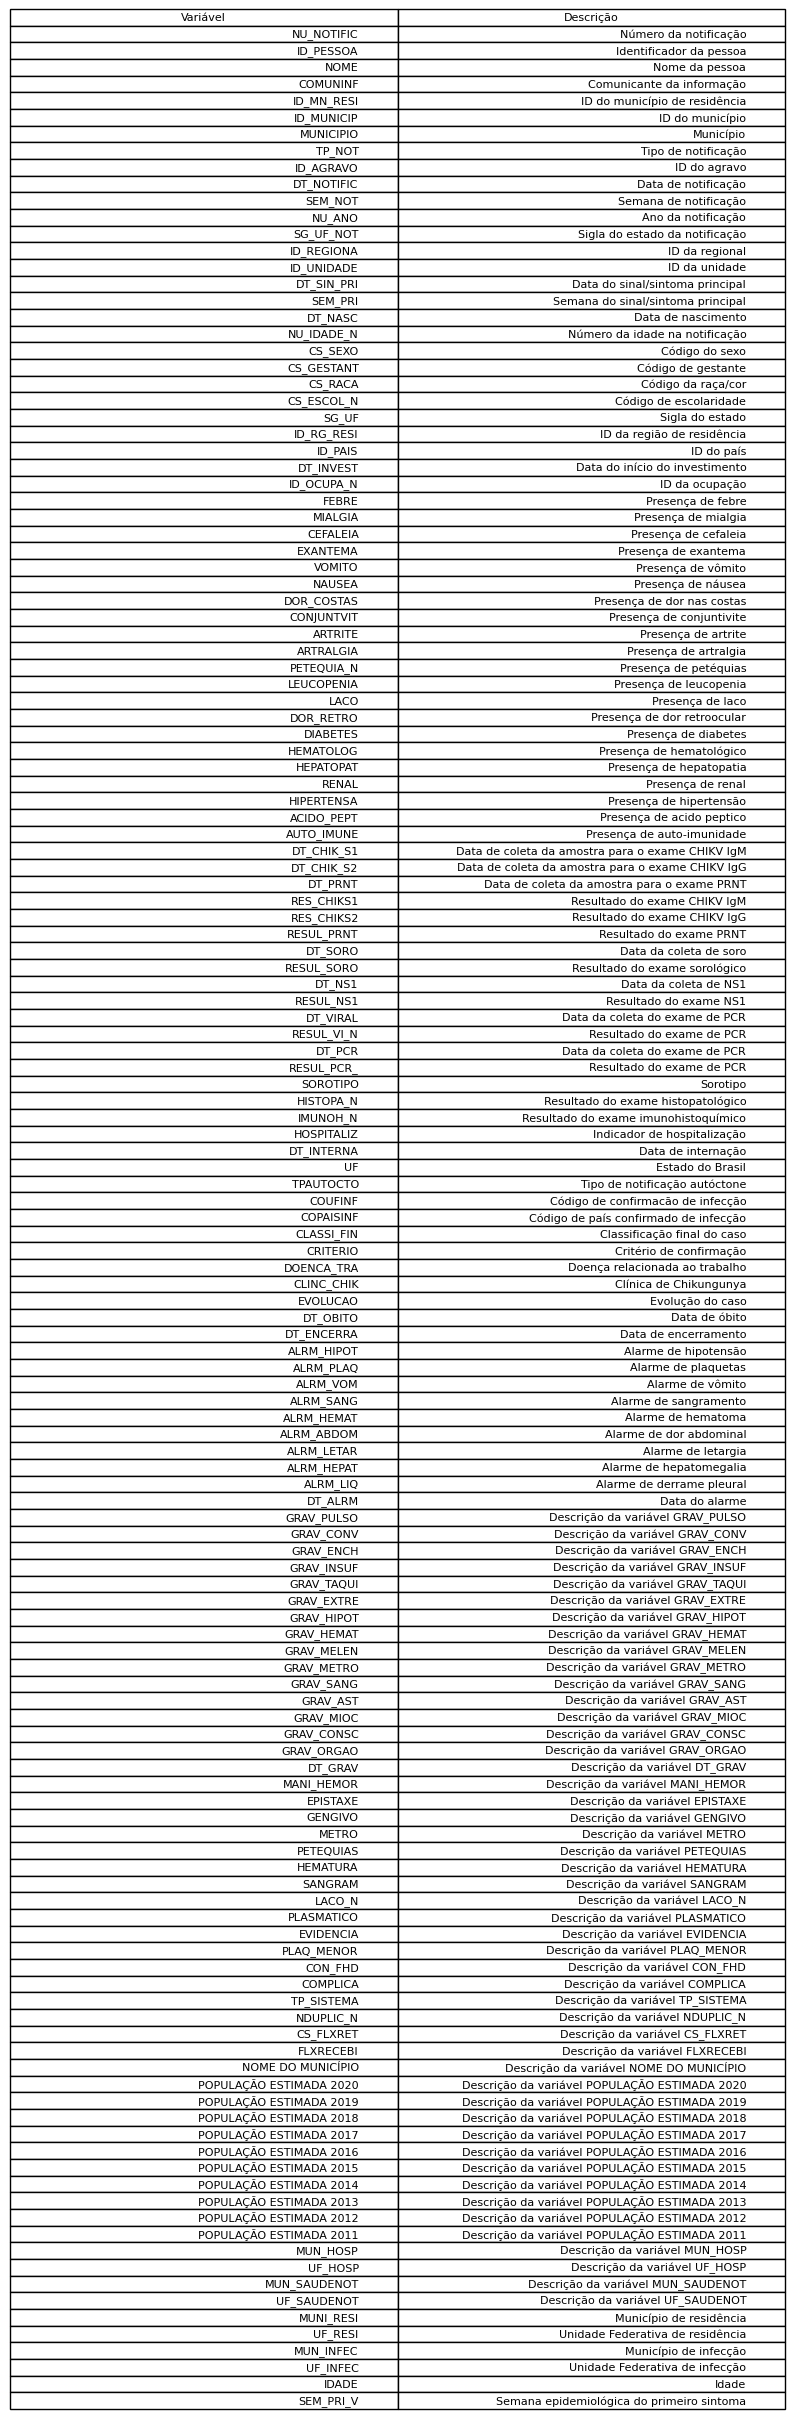

In [ ]:
import matplotlib.pyplot as plt

# Configurações para ocultar os eixos
plt.figure(figsize=(10, 6))
plt.axis('off')

# Criar tabela
plt.table(cellText=df_descricao_variaveis.values,
          colLabels=df_descricao_variaveis.columns,
          loc='center')

# Exibir a tabela
plt.show()


Os dados fornecidos são uma coleção de informações clínicas e demográficas sobre pacientes com o diagnóstico de Dengue. A análise desses dados pode revelar insights importantes sobre a ocorrência e desfecho de casos. Dentre os aspectos observados, destacam-se:

Perfil Demográfico: Os dados contêm informações sobre a idade e localização geográfica dos pacientes, fornecendo insights sobre a distribuição demográfica da população afetada.

Evolução Temporal: Variáveis relacionadas a datas, como datas de investigação, exames e encerramento de casos, permitem acompanhar a evolução temporal da doença e sua propagação na região.

Gravidade dos Casos: Existem indicadores de gravidade dos casos, como sintomas e resultados de exames, que podem ajudar a identificar fatores de risco e padrões de sintomas associados a desfechos graves, como óbito.

Contexto Demográfico: As informações sobre a população estimada em diferentes anos permitem contextualizar a gravidade da situação em relação ao tamanho da população.

Correlações e Insights: A análise dos dados pode revelar correlações entre diferentes variáveis e insights sobre os determinantes da gravidade da doença e o desfecho dos casos.

No geral, a análise desses dados pode fornecer informações valiosas para entender a dinâmica da doença na região, identificar grupos de maior risco e orientar políticas e estratégias de saúde pública.

In [313]:
# Carregue o arquivo CSV em um DataFrame, especificando o separador como ';'
df = pd.read_csv('/content/sample_data/dengue.csv', sep=';')

# Visualize as primeiras 5 linhas do DataFrame
print(df.head())

   NU_NOTIFIC                       ID_PESSOA  \
0       10110  291800-291800-1982-06-23-M-4.0   
1        1994  291800-291800-1984-07-26-M-4.0   
2        5321  291890-291890-1988-06-22-F-2.0   
3       15811  293105-293105-2004-12-29-F-2.0   
4       23461  293105-293105-1961-01-25-M-2.0   

                                       NOME  COMUNINF  ID_MN_RESI  ID_MUNICIP  \
0        ALBERTO GARCIA MACIEL FILHO AGUIAR  290060.0      291800      291800   
1                    MARCIO RIBEIRO FONSECA       NaN      291800      291800   
2      SOLANGE MOREIRA SANTOS CARDOSO ASSIS  291890.0      291890      291890   
3                     PATRICIA BORGES ROCHA  293105.0      293105      293105   
4  WALTER AMARAL RIBEIRO RODRIGUES PINHEIRO  293105.0      293105      293105   

   MUNICIPIO  TP_NOT ID_AGRAVO  DT_NOTIFIC  ...  MUN_HOSP  UF_HOSP  \
0        NaN       2       A90  2012-12-31  ...       NaN      NaN   
1        NaN       2       A90  2013-01-01  ...       NaN      NaN   
2       

<ipython-input-313-c4c76c5239d4>:2: DtypeWarning: Columns (27,49,51,88,104) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/sample_data/dengue.csv', sep=';')


In [ ]:
# Crie um novo DataFrame contendo apenas os nomes das colunas
colunas_df = pd.DataFrame(df.columns, columns=["Colunas"])

# Salve o DataFrame com os nomes das colunas como um arquivo CSV
colunas_df.to_csv('/content/sample_data/colunas_dengue.csv', index=False)

print("Arquivo 'colunas_dengue.csv' salvo com sucesso.")

Arquivo 'colunas_dengue.csv' salvo com sucesso.


In [ ]:
# Exibir informações sobre as variáveis do DataFrame
print("Informações sobre as variáveis:")
print(df.info())
print()

Informações sobre as variáveis:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38569 entries, 0 to 38568
Columns: 143 entries, NU_NOTIFIC to SEM_PRI_V
dtypes: float64(96), int64(21), object(26)
memory usage: 42.1+ MB
None



In [ ]:
# Exibir a forma do DataFrame
print("Shape do DataFrame:", df.shape)

Shape do DataFrame: (38569, 143)


In [ ]:
# Exibir estatísticas descritivas para variáveis
print(df.describe())

         NU_NOTIFIC       COMUNINF     ID_MN_RESI     ID_MUNICIP  \
count  38569.000000   10744.000000   38569.000000   38569.000000   
mean   19313.633566  291693.539929  291789.396225  291942.925847   
std    11151.756624    2923.946850     910.836858    6086.043836   
min        1.000000  170700.000000  290010.000000  170550.000000   
25%     9655.000000  291110.000000  291080.000000  291080.000000   
50%    19311.000000  291480.000000  291640.000000  291640.000000   
75%    28973.000000  292212.500000  292740.000000  292740.000000   
max    38625.000000  530010.000000  293360.000000  530010.000000   

           MUNICIPIO   TP_NOT        SEM_NOT        NU_ANO     SG_UF_NOT  \
count    1246.000000  38569.0   38569.000000  38569.000000  38569.000000   
mean   292026.386035      2.0  201608.129171   2015.889860     29.015401   
std     10347.111377      0.0     218.718576      2.162215      0.612877   
min    172100.000000      2.0  201301.000000   2012.000000     17.000000   
25%    

In [ ]:
colunas_com_nan = df.columns[df.isna().any()].tolist()
print("Colunas que possuem valores NaN:")
print(colunas_com_nan)

linhas_com_nan = df.isna().any(axis=1).sum()
print("Número de linhas com valores NaN:", linhas_com_nan)

Colunas que possuem valores NaN:
['COMUNINF', 'MUNICIPIO', 'ID_REGIONA', 'ID_UNIDADE', 'CS_GESTANT', 'CS_ESCOL_N', 'DT_INVEST', 'ID_OCUPA_N', 'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 'LEUCOPENIA', 'LACO', 'DOR_RETRO', 'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE', 'DT_CHIK_S1', 'DT_CHIK_S2', 'DT_PRNT', 'RES_CHIKS1', 'RES_CHIKS2', 'RESUL_PRNT', 'DT_SORO', 'RESUL_SORO', 'DT_NS1', 'RESUL_NS1', 'DT_VIRAL', 'RESUL_VI_N', 'DT_PCR', 'RESUL_PCR_', 'SOROTIPO', 'HISTOPA_N', 'IMUNOH_N', 'HOSPITALIZ', 'DT_INTERNA', 'UF', 'TPAUTOCTO', 'COUFINF', 'COPAISINF', 'CLASSI_FIN', 'CRITERIO', 'DOENCA_TRA', 'CLINC_CHIK', 'EVOLUCAO', 'DT_OBITO', 'DT_ENCERRA', 'ALRM_HIPOT', 'ALRM_PLAQ', 'ALRM_VOM', 'ALRM_SANG', 'ALRM_HEMAT', 'ALRM_ABDOM', 'ALRM_LETAR', 'ALRM_HEPAT', 'ALRM_LIQ', 'DT_ALRM', 'GRAV_PULSO', 'GRAV_CONV', 'GRAV_ENCH', 'GRAV_INSUF', 'GRAV_TAQUI', 'GRAV_EXTRE', 'GRAV_HIPOT'

#'ID_PESSOA': 'Identificador da pessoa',#

In [ ]:
# Verifique quantos valores em branco (NaN) existem na coluna 'ID_PESSOA'
valores_em_branco = df['ID_PESSOA'].isnull().sum()
print("Valores em branco (NaN) em 'ID_PESSOA':", valores_em_branco)

Valores em branco (NaN) em 'ID_PESSOA': 0


In [ ]:
# Verifique quantos valores em branco (NaN) existem na coluna 'NOME'
valores_em_branco = df['NOME'].isnull().sum()
print("Valores em branco (NaN) em 'NOME':", valores_em_branco)

Valores em branco (NaN) em 'NOME': 0


#'NU_NOTIFIC': 'Número da notificação',#

In [ ]:
# Verifique quantos valores em branco (NaN) existem na coluna 'NU_NOTIFIC'
valores_em_branco = df['NU_NOTIFIC'].isnull().sum()
print("Valores em branco (NaN) em 'NU_NOTIFIC':", valores_em_branco)

Valores em branco (NaN) em 'NU_NOTIFIC': 0


#'COMUNINF': 'Comunicante da informação',#

In [ ]:
# Retorne os primeiros 8 valores da variável 'COMUNINF'
primeiros_valores_comuninf = df['COMUNINF'].head(8)

# Exibir os primeiros 8 valores da variável 'COMUNINF'
print(primeiros_valores_comuninf)

0    290060.0
1         NaN
2    291890.0
3    293105.0
4    293105.0
5    292680.0
6    291330.0
7         NaN
Name: COMUNINF, dtype: float64


In [ ]:
# Verifique quantos valores nulos existem na variável 'COMUNINF'
valores_nulos_comuninf = df['COMUNINF'].isnull().sum()

# Exibir o número de valores nulos na variável 'COMUNINF'
print("Número de valores nulos na variável 'COMUNINF':", valores_nulos_comuninf)

Número de valores nulos na variável 'COMUNINF': 27825


#'ID_MN_RESI': 'ID do município de residência',#

In [ ]:
# Exibir as primeiras linhas da variável 'ID_MN_RESI'
primeiras_linhas_id_mn_resi = df['ID_MN_RESI'].head()

# Exibir as primeiras linhas da variável 'ID_MN_RESI'
print(primeiras_linhas_id_mn_resi)

0    291800
1    291800
2    291890
3    293105
4    293105
Name: ID_MN_RESI, dtype: int64


In [ ]:
# Conte o número de valores nulos na coluna 'ID_MN_RESI'
valores_nulos_id_mn_resi = df['ID_MN_RESI'].isnull().sum()

# Exibir o número de valores nulos na coluna 'ID_MN_RESI'
print("Número de valores nulos na coluna 'ID_MN_RESI':", valores_nulos_id_mn_resi)

Número de valores nulos na coluna 'ID_MN_RESI': 0


#'ID_MUNICIP': 'ID do município',#

In [ ]:
# Verificar se há valores nulos na coluna 'ID_MUNICIP'
valores_nulos_id_municip = df['ID_MUNICIP'].isnull().any()

# Exibir se há valores nulos na coluna 'ID_MUNICIP'
if valores_nulos_id_municip:
    print("Sim, existem valores nulos na coluna 'ID_MUNICIP'.")
else:
    print("Não existem valores nulos na coluna 'ID_MUNICIP'.")

Não existem valores nulos na coluna 'ID_MUNICIP'.


In [ ]:
# Contar o número de valores únicos na coluna 'ID_MUNICIP'
num_valores_unicos_id_municip = df['ID_MUNICIP'].nunique()

# Exibir o número de valores únicos
print("Número de valores únicos na coluna 'ID_MUNICIP':", num_valores_unicos_id_municip)

Número de valores únicos na coluna 'ID_MUNICIP': 466


In [ ]:
# Contar o número de valores únicos em 'ID_MUNICIP' e 'MUNICIPIO'
num_valores_unicos_id_municip = df['ID_MUNICIP'].nunique()
num_valores_unicos_municipio = df['MUNICIPIO'].nunique()

# Exibir o número de valores únicos em 'ID_MUNICIP' e 'MUNICIPIO'
print("Número de valores únicos em 'ID_MUNICIP':", num_valores_unicos_id_municip)
print("Número de valores únicos em 'MUNICIPIO':", num_valores_unicos_municipio)

# Verificar se os números são iguais
if num_valores_unicos_id_municip == num_valores_unicos_municipio:
    print("O número de valores únicos em 'ID_MUNICIP' é igual ao número de valores únicos em 'MUNICIPIO'.")
else:
    print("Os números de valores únicos em 'ID_MUNICIP' e 'MUNICIPIO' são diferentes.")

Número de valores únicos em 'ID_MUNICIP': 466
Número de valores únicos em 'MUNICIPIO': 198
Os números de valores únicos em 'ID_MUNICIP' e 'MUNICIPIO' são diferentes.



#'TP_NOT': 'Tipo de notificação',#


In [ ]:
# Exibir as primeiras linhas da variável 'TP_NOT'
primeiras_linhas_tp_not = df['TP_NOT'].head()

# Exibir as primeiras linhas da variável 'TP_NOT'
print(primeiras_linhas_tp_not)

0    2
1    2
2    2
3    2
4    2
Name: TP_NOT, dtype: int64


In [ ]:
# Obter valores distintos da coluna 'TP_NOT'
valores_distintos_tp_not = df['TP_NOT'].drop_duplicates()

# Exibir os valores distintos
print("Valores distintos da variável 'TP_NOT':")
print(valores_distintos_tp_not)

Valores distintos da variável 'TP_NOT':
0    2
Name: TP_NOT, dtype: int64


#O código é A90, a descrição é dengue [dengue clássico], classificado como não tem dupla classificação, a restrição para o sexo (CLASSIFICAÇÃO INTERNACIONAL DE DOENÇA#

In [ ]:
# Exibir os primeiros valores da variável 'ID_AGRAVO'
primeiros_valores_id_agravo = df['ID_AGRAVO'].head()

# Exibir os primeiros valores da variável 'ID_AGRAVO'
print(primeiros_valores_id_agravo)

0    A90
1    A90
2    A90
3    A90
4    A90
Name: ID_AGRAVO, dtype: object


In [ ]:
# Obter valores distintos da coluna 'ID_AGRAVO'
valores_distintos_id_agravo = df['ID_AGRAVO'].drop_duplicates()

# Exibir os valores distintos
print("Valores distintos da variável 'ID_AGRAVO':")
print(valores_distintos_id_agravo)

Valores distintos da variável 'ID_AGRAVO':
0    A90
Name: ID_AGRAVO, dtype: object


In [ ]:
# Exibir os primeiros valores da variável 'DT_NOTIFIC'
primeiros_valores_dt_notific = df['DT_NOTIFIC'].head()

# Exibir os primeiros valores da variável 'DT_NOTIFIC'
print(primeiros_valores_dt_notific)

0    2012-12-31
1    2013-01-01
2    2013-01-01
3    2013-01-01
4    2013-01-01
Name: DT_NOTIFIC, dtype: object


In [ ]:
# Converter a variável 'DT_NOTIFIC' para datetime
df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'])

# Extrair o ano e contar os valores distintos
anos_distintos = df['DT_NOTIFIC'].dt.year.nunique()

# Exibir o número de anos distintos
print("Número de anos distintos na variável 'DT_NOTIFIC':", anos_distintos)


Número de anos distintos na variável 'DT_NOTIFIC': 8


In [ ]:
# Converter a variável 'DT_NOTIFIC' para datetime
df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'])

# Extrair os anos distintos
anos_distintos = df['DT_NOTIFIC'].dt.year.unique()

# Exibir os anos distintos
print("Anos distintos na variável 'DT_NOTIFIC':")
print(anos_distintos)

Anos distintos na variável 'DT_NOTIFIC':
[2012 2013 2014 2015 2016 2017 2018 2019]


In [ ]:
# Converter a variável 'DT_NOTIFIC' para datetime
df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'])

# Extrair os meses (MM) e contar as ocorrências de cada mês
contagem_meses = df['DT_NOTIFIC'].dt.month.value_counts()

# Exibir o mês com a maior contagem
mes_maior_contagem = contagem_meses.idxmax()
contagem_maior_contagem = contagem_meses.max()
print(f"Mês com maior contagem: {mes_maior_contagem}, com {contagem_maior_contagem} ocorrências")

# Extrair os anos (YYYY) e contar as ocorrências de cada ano
contagem_anos = df['DT_NOTIFIC'].dt.year.value_counts()

# Exibir o ano com a maior repetição
ano_maior_repeticao = contagem_anos.idxmax()
repeticao_maior_repeticao = contagem_anos.max()
print(f"Ano com maior repetição: {ano_maior_repeticao}, com {repeticao_maior_repeticao} ocorrências")

Mês com maior contagem: 3, com 7092 ocorrências
Ano com maior repetição: 2019, com 9161 ocorrências


In [ ]:
# Exibir os primeiros valores da variável 'SEM_NOT'
primeiros_valores_sem_not = df['SEM_NOT'].head()

# Exibir os primeiros valores da variável 'SEM_NOT'
print(primeiros_valores_sem_not)

0    201301
1    201301
2    201301
3    201301
4    201301
Name: SEM_NOT, dtype: int64


In [ ]:
# Exibir os primeiros valores da variável 'NU_ANO'
primeiros_valores_NU_ANO= df['NU_ANO'].head()

# Exibir os primeiros valores da variável 'NU_ANO'
print(primeiros_valores_NU_ANO)

0    2012
1    2013
2    2013
3    2013
4    2013
Name: NU_ANO, dtype: int64


In [ ]:
# Obter os valores distintos da coluna 'NU_ANO'
valores_distintos_nu_ano = df['NU_ANO'].unique()

# Exibir os valores distintos
print("Valores distintos da variável 'NU_ANO':")
print(valores_distintos_nu_ano)

Valores distintos da variável 'NU_ANO':
[2012 2013 2014 2015 2016 2017 2018 2019]


In [ ]:
# Exibir os primeiros valores da variável 'SG_UF_NOT'
primeiros_valores_sg_uf_not = df['SG_UF_NOT'].head()

# Exibir os primeiros valores da variável 'SG_UF_NOT'
print(primeiros_valores_sg_uf_not)

0    29
1    29
2    29
3    29
4    29
Name: SG_UF_NOT, dtype: int64


In [ ]:
# Obter os valores distintos da coluna 'SG_UF_NOT'
valores_distintos_sg_uf_not = df['SG_UF_NOT'].unique()

# Exibir os valores distintos
print("Valores distintos da variável 'SG_UF_NOT':")
print(valores_distintos_sg_uf_not)

Valores distintos da variável 'SG_UF_NOT':
[29 53 35 31 42 41 52 32 17 26 28 51 23 22 24 33 27]


In [ ]:
# Exibir as primeiras linhas da variável 'ID_REGIONA'
primeiras_linhas_id_regiona = df['ID_REGIONA'].head()

# Exibir as primeiras linhas da variável 'ID_REGIONA'
print(primeiras_linhas_id_regiona)

0    1391.0
1    1391.0
2    1388.0
3    1402.0
4    1402.0
Name: ID_REGIONA, dtype: float64


In [ ]:
# Exibir as primeiras linhas da variável 'ID_UNIDADE'
primeiras_linhas_id_unidade = df['ID_UNIDADE'].head()

# Exibir as primeiras linhas da variável 'ID_UNIDADE'
print(primeiras_linhas_id_unidade)

0    2400693.0
1    2400693.0
2    2771365.0
3    4032837.0
4    4032837.0
Name: ID_UNIDADE, dtype: float64


In [ ]:
# Exibir as primeiras linhas da variável 'DT_SIN_PRI'
primeiras_linhas_dt_sin_pri = df['DT_SIN_PRI'].head()

# Exibir as primeiras linhas da variável 'DT_SIN_PRI'
print(primeiras_linhas_dt_sin_pri)

0    2012-12-30
1    2012-12-30
2    2012-12-31
3    2012-12-31
4    2012-12-31
Name: DT_SIN_PRI, dtype: object


In [ ]:
# Converter a coluna 'DT_SIN_PRI' para datetime
df['DT_SIN_PRI'] = pd.to_datetime(df['DT_SIN_PRI'])

# Extrair o ano e o mês
df['Ano'] = df['DT_SIN_PRI'].dt.year
df['Mês'] = df['DT_SIN_PRI'].dt.month

# Contar as ocorrências de cada ano e mês
contagem_anos = df['Ano'].value_counts()
contagem_meses = df['Mês'].value_counts()

# Encontrar o ano com a maior contagem
ano_maior_ocorrencia = contagem_anos.idxmax()
contagem_maior_ocorrencia_ano = contagem_anos.max()

# Encontrar o mês com a maior contagem
mes_maior_ocorrencia = contagem_meses.idxmax()
contagem_maior_ocorrencia_mes = contagem_meses.max()

# Exibir o ano e mês com a maior ocorrência
print("Ano com maior ocorrência:", ano_maior_ocorrencia, "com", contagem_maior_ocorrencia_ano, "ocorrências")
print("Mês com maior ocorrência:", mes_maior_ocorrencia, "com", contagem_maior_ocorrencia_mes, "ocorrências")

Ano com maior ocorrência: 2019 com 9088 ocorrências
Mês com maior ocorrência: 3 com 7303 ocorrências


In [ ]:
# Exibir estatísticas descritivas da variável 'SEM_PRI'
print(df['SEM_PRI'].describe())

count     38569.000000
mean     201596.524929
std         302.129007
min      193322.000000
25%      201421.000000
50%      201605.000000
75%      201827.000000
max      201952.000000
Name: SEM_PRI, dtype: float64


In [ ]:
# Exibir os primeiros registros da variável 'DT_NASC'
primeiros_registros_dt_nasc = df['DT_NASC'].head()

# Exibir os primeiros registros da variável 'DT_NASC'
print(primeiros_registros_dt_nasc)

0   1982-06-23
1   1984-07-26
2   1988-06-22
3   2004-12-29
4   1961-01-25
Name: DT_NASC, dtype: datetime64[ns]


In [ ]:
from datetime import datetime

# Converter a coluna 'DT_NASC' para o tipo datetime
df['DT_NASC'] = pd.to_datetime(df['DT_NASC'])

# Calcular a idade das pessoas
data_atual = datetime.now()
df['Idade'] = (data_atual - df['DT_NASC']).astype('<m8[Y]').astype(int)

# Exibir as primeiras linhas com a idade calculada
print(df[['DT_NASC', 'Idade']].head())

# Descrever estatísticas da idade calculada
print("\nDescrição da idade calculada:")
print(df['Idade'].describe())

     DT_NASC  Idade
0 1982-06-23     41
1 1984-07-26     39
2 1988-06-22     35
3 2004-12-29     19
4 1961-01-25     63

Descrição da idade calculada:
count    38569.000000
mean        39.411289
std         19.065141
min          4.000000
25%         25.000000
50%         37.000000
75%         52.000000
max        122.000000
Name: Idade, dtype: float64


In [ ]:
import pandas as pd

# Definir os intervalos para as faixas etárias de 5 em 5 anos
faixas_etarias = range(0, 101, 5)  # De 0 a 100 anos, com intervalos de 5 anos

# Definir os rótulos para as faixas etárias
rotulos_faixas_etarias = [f'{i}-{i+4}' for i in range(0, 100, 5)]

# Adicionar uma coluna 'Faixa Etária' ao DataFrame com base na coluna 'Idade'
df['Faixa Etária'] = pd.cut(df['Idade'], bins=faixas_etarias, labels=rotulos_faixas_etarias, right=False)

# Exibir o DataFrame com a nova coluna de faixa etária
print(df)


       NU_NOTIFIC                       ID_PESSOA  \
0           10110  291800-291800-1982-06-23-M-4.0   
1            1994  291800-291800-1984-07-26-M-4.0   
2            5321  291890-291890-1988-06-22-F-2.0   
3           15811  293105-293105-2004-12-29-F-2.0   
4           23461  293105-293105-1961-01-25-M-2.0   
...           ...                             ...   
38564       19618  291080-291080-1985-10-04-F-9.0   
38565        6805  292740-292740-1981-05-01-M-4.0   
38566       16531  292740-292740-1996-10-04-M-9.0   
38567       31594  292740-292740-1991-07-05-F-9.0   
38568        1174  292740-292740-1957-10-01-F-4.0   

                                           NOME  COMUNINF  ID_MN_RESI  \
0            ALBERTO GARCIA MACIEL FILHO AGUIAR  290060.0      291800   
1                        MARCIO RIBEIRO FONSECA       NaN      291800   
2          SOLANGE MOREIRA SANTOS CARDOSO ASSIS  291890.0      291890   
3                         PATRICIA BORGES ROCHA  293105.0      293105  

In [ ]:
# Calcular a tabela de frequência absoluta das faixas etárias
tabela_frequencia_absoluta = df['Faixa Etária'].value_counts().reset_index()
tabela_frequencia_absoluta.columns = ['Faixa Etária', 'Frequência Absoluta']

# Calcular a frequência relativa das faixas etárias
total_observacoes = tabela_frequencia_absoluta['Frequência Absoluta'].sum()
tabela_frequencia_absoluta['%'] = round((tabela_frequencia_absoluta['Frequência Absoluta'] / total_observacoes) * 100, 2)

# Ordenar as faixas etárias
tabela_frequencia_absoluta = tabela_frequencia_absoluta.sort_values(by='Faixa Etária')

# Exibir a tabela de frequência absoluta
print("Tabela de Frequência Absoluta das Faixas Etárias:")
print(tabela_frequencia_absoluta)



Tabela de Frequência Absoluta das Faixas Etárias:
   Faixa Etária  Frequência Absoluta      %
19          0-4                   81   0.21
12          5-9                 1015   2.63
9         10-14                 2128   5.52
6         15-19                 2624   6.81
4         20-24                 3402   8.83
0         25-29                 4036  10.48
3         30-34                 3743   9.72
1         35-39                 3877  10.06
2         40-44                 3782   9.82
5         45-49                 3055   7.93
7         50-54                 2547   6.61
8         55-59                 2206   5.73
10        60-64                 1740   4.52
11        65-69                 1383   3.59
13        70-74                 1001   2.60
14        75-79                  780   2.02
15        80-84                  508   1.32
16        85-89                  318   0.83
17        90-94                  205   0.53
18        95-99                   91   0.24


<ipython-input-136-5d6c50205090>:28: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Frequência Absoluta')


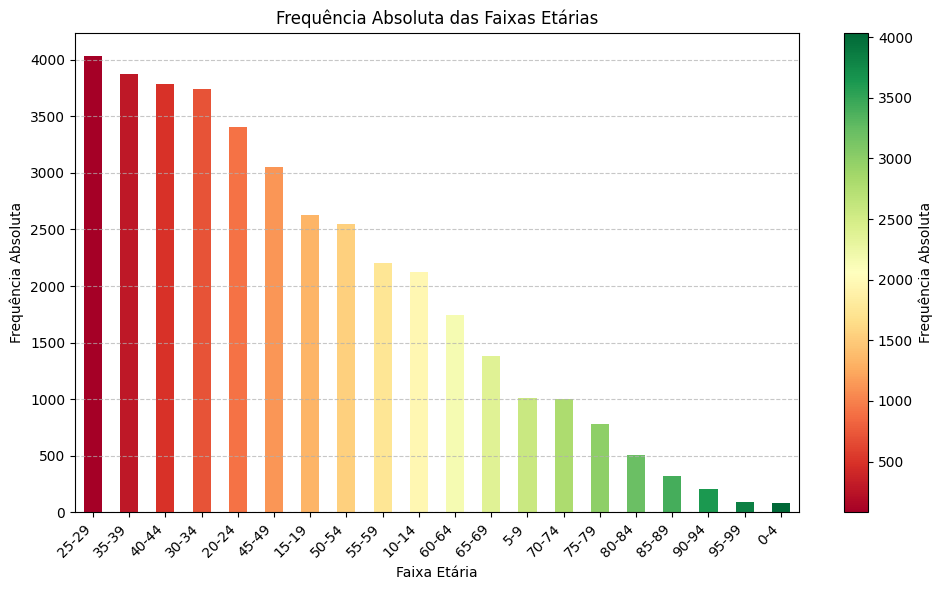

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular a frequência absoluta das faixas etárias
frequencia_absoluta = df['Faixa Etária'].value_counts()

# Obter a faixa etária com a menor e maior frequência absoluta
faixa_menor_frequencia = frequencia_absoluta.idxmin()
faixa_maior_frequencia = frequencia_absoluta.idxmax()

# Definir a paleta de cores
cores = plt.cm.RdYlGn(np.linspace(0, 1, len(frequencia_absoluta)))

# Plotar o gráfico de barras com a escala de cores
grafico = frequencia_absoluta.plot(kind='bar', figsize=(10, 6), color=cores)

# Definir título e rótulos dos eixos
plt.title('Frequência Absoluta das Faixas Etárias')
plt.xlabel('Faixa Etária')
plt.ylabel('Frequência Absoluta')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Criar uma barra de cores para a legenda
sm = plt.cm.ScalarMappable(cmap=plt.cm.RdYlGn, norm=plt.Normalize(vmin=frequencia_absoluta.min(), vmax=frequencia_absoluta.max()))
sm.set_array([])
plt.colorbar(sm, label='Frequência Absoluta')

plt.show()



<ipython-input-138-e06760e5c736>:32: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Frequência Absoluta')


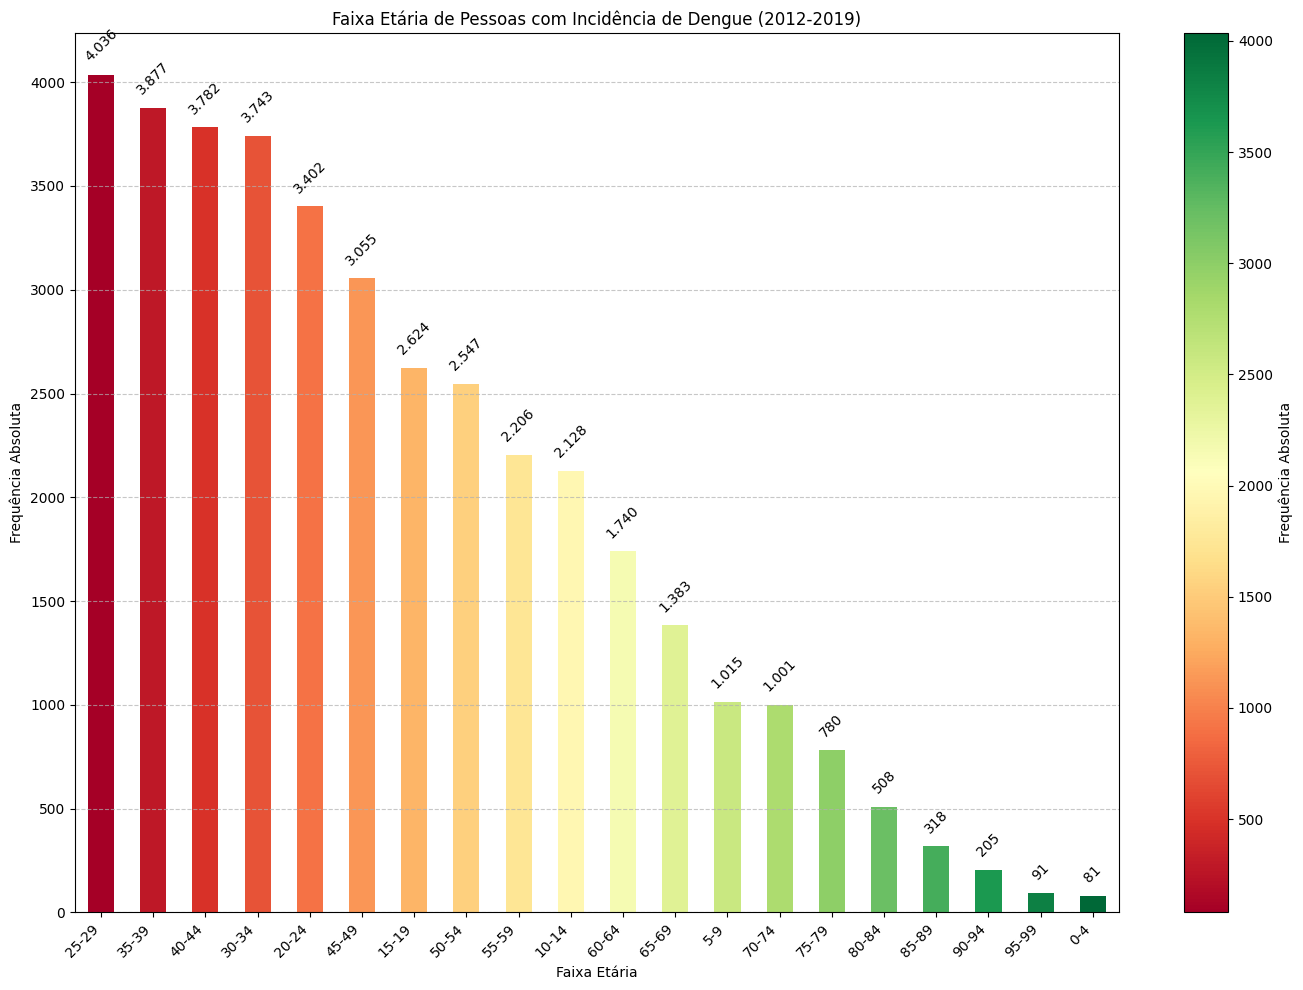

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular a frequência absoluta das faixas etárias
frequencia_absoluta = df['Faixa Etária'].value_counts()

# Obter a faixa etária com a menor e maior frequência absoluta
faixa_menor_frequencia = frequencia_absoluta.idxmin()
faixa_maior_frequencia = frequencia_absoluta.idxmax()

# Definir a paleta de cores
cores = plt.cm.RdYlGn(np.linspace(0, 1, len(frequencia_absoluta)))

# Plotar o gráfico de barras com a escala de cores
grafico = frequencia_absoluta.plot(kind='bar', figsize=(14, 10), color=cores)

# Adicionar título e rótulos dos eixos
plt.title('Faixa Etária de Pessoas com Incidência de Dengue (2012-2019)')
plt.xlabel('Faixa Etária')
plt.ylabel('Frequência Absoluta')

# Adicionar rótulos dos números nas barras com formatação
for i, barra in enumerate(grafico.patches):
    plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height() + 50, '{:,.0f}'.format(barra.get_height()).replace(',', '.'), ha='center', va='bottom', rotation=45)

# Rotacionar os rótulos do eixo x em 45 graus
plt.xticks(rotation=45, ha='right')

# Adicionar barra de cores para a legenda
sm = plt.cm.ScalarMappable(cmap=plt.cm.RdYlGn, norm=plt.Normalize(vmin=frequencia_absoluta.min(), vmax=frequencia_absoluta.max()))
sm.set_array([])
plt.colorbar(sm, label='Frequência Absoluta')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [ ]:
print(df['NU_IDADE_N'].head())


0    4030
1    4028
2    4024
3    4008
4    4051
Name: NU_IDADE_N, dtype: int64


In [ ]:
print(df['CS_SEXO'].head())

0    M
1    M
2    F
3    F
4    M
Name: CS_SEXO, dtype: object


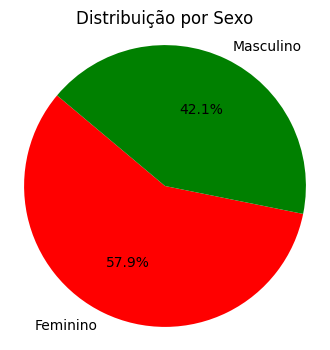

Contagem por Sexo:
F    22346
M    16223
Name: CS_SEXO, dtype: int64

Porcentagem por Sexo:
F    57.937722
M    42.062278
Name: CS_SEXO, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# Contar os valores da variável CS_SEXO
contagem_sexo = df['CS_SEXO'].value_counts()

# Calcular a porcentagem
porcentagem = contagem_sexo / contagem_sexo.sum() * 100

# Definir cores para os setores
cores = ['red' if sexo == contagem_sexo.idxmax() else 'green' for sexo in contagem_sexo.index]

# Substituir 'M' por 'Masculino' e 'F' por 'Feminino'
labels = contagem_sexo.index.map({'M': 'Masculino', 'F': 'Feminino'})

# Plotar o gráfico de setor
plt.figure(figsize=(4, 4))
plt.pie(contagem_sexo, labels=labels, colors=cores, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição por Sexo')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Exibir contagem e porcentagem
print("Contagem por Sexo:")
print(contagem_sexo)
print("\nPorcentagem por Sexo:")
print(porcentagem)



In [ ]:
print(df['CS_GESTANT'].head())


0    6.0
1    6.0
2    5.0
3    6.0
4    6.0
Name: CS_GESTANT, dtype: float64


In [ ]:
print(df['CS_GESTANT'].unique())


[ 6.  5.  9.  3.  4.  1.  2. nan]


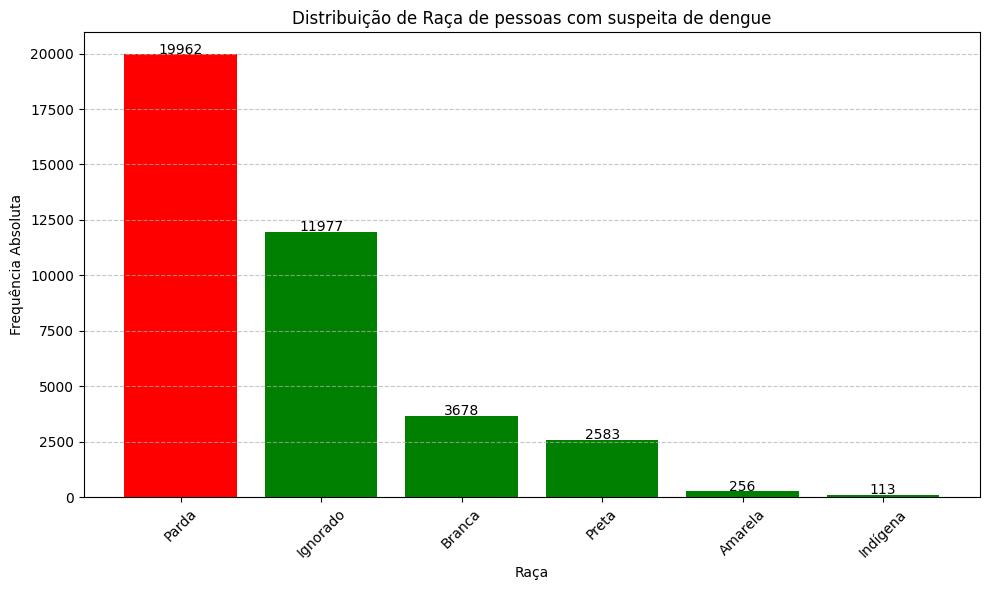

Contagem de Raça:
4.0    19962
9.0    11977
1.0     3678
2.0     2583
3.0      256
5.0      113
Name: CS_RACA, dtype: int64

Porcentagem de Raça:
4.0    51.756592
9.0    31.053437
1.0     9.536156
2.0     6.697088
3.0     0.663745
5.0     0.292981
Name: CS_RACA, dtype: float64


In [ ]:
# Remover os valores NaN da contagem de raça
contagem_raca = df['CS_RACA'].value_counts().dropna()

# Calcular a porcentagem
porcentagem_raca = contagem_raca / contagem_raca.sum() * 100

# Mapear os códigos de raça para seus respectivos significados
labels_raca = contagem_raca.index.map({1: 'Branca', 2: 'Preta', 3: 'Amarela', 4: 'Parda', 5: 'Indígena', 9: 'Ignorado'})

# Definir cores para as barras
cores_raca = ['red' if raca == contagem_raca.idxmax() else 'green' for raca in contagem_raca.index]

# Plotar o gráfico de barras sem incluir NaN
plt.figure(figsize=(10, 6))
plt.bar(labels_raca.astype(str), contagem_raca, color=cores_raca)
plt.title('Distribuição de Raça de pessoas com suspeita de dengue')
plt.xlabel('Raça')
plt.ylabel('Frequência Absoluta')
plt.xticks(rotation=45)

# Adicionar rótulos nas barras
for i, valor in enumerate(contagem_raca):
    plt.text(i, valor + 20, str(valor), ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Exibir contagem e porcentagem
print("Contagem de Raça:")
print(contagem_raca)
print("\nPorcentagem de Raça:")
print(porcentagem_raca)




In [ ]:
print(df['CS_ESCOL_N'].head())


0    6.0
1    6.0
2    6.0
3    NaN
4    9.0
Name: CS_ESCOL_N, dtype: float64


In [ ]:
valores_distintos_escolaridade = df['CS_ESCOL_N'].unique()
print("Valores distintos na variável CS_ESCOL_N:", valores_distintos_escolaridade)


Valores distintos na variável CS_ESCOL_N: [ 6. nan  9.  7.  3.  8. 10.  5.  4.  2.  1.  0.]


In [ ]:
print(df['SG_UF'].head())


0    29.0
1    29.0
2    29.0
3    29.0
4    29.0
Name: SG_UF, dtype: float64


In [ ]:
valores_distintos_uf = df['SG_UF'].unique()
print("Valores distintos na variável SG_UF:", valores_distintos_uf)


Valores distintos na variável SG_UF: [29.]


In [ ]:
print(df['ID_RG_RESI'].head())


0    1391
1    1391
2    1388
3    1402
4    1402
Name: ID_RG_RESI, dtype: int64


In [ ]:
print(df['ID_PAIS'].head())


0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: ID_PAIS, dtype: float64


In [ ]:
valores_nan = df['ID_PAIS'].isna().any()
print("Há valores NaN na variável ID_PAIS:", valores_nan)

valores_distintos_pais = df['ID_PAIS'].unique()
print("Valores possíveis na variável ID_PAIS:")
print(valores_distintos_pais)


Há valores NaN na variável ID_PAIS: False
Valores possíveis na variável ID_PAIS:
[1.]


In [ ]:
print(df['DT_INVEST'].head())


0    2012-12-31
1    2013-01-01
2    2013-01-01
3    2013-01-10
4    2013-01-10
Name: DT_INVEST, dtype: object


In [ ]:
print(df['ID_OCUPA_N'].head())


0    342305.0
1         NaN
2         NaN
3         NaN
4         NaN
Name: ID_OCUPA_N, dtype: object


In [ ]:
import pandas as pd

# Selecionar as colunas relevantes
colunas_sintomas = ['FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS',
                    'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 'LEUCOPENIA', 'LACO', 'DOR_RETRO',
                    'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE']

# Inicializar um dicionário para armazenar as frequências
frequencias = {'Sintoma': [], 'Frequência Absoluta': [], 'Porcentagem': []}

# Calcular frequências para cada sintoma
for sintoma in colunas_sintomas:
    frequencia_absoluta = df[sintoma].sum()
    frequencia_porcentagem = (frequencia_absoluta / len(df)) * 100
    frequencias['Sintoma'].append(sintoma)
    frequencias['Frequência Absoluta'].append(frequencia_absoluta)
    frequencias['Porcentagem'].append(f'{frequencia_porcentagem:.2f}%')

# Criar o DataFrame com as frequências
tabela_frequencias = pd.DataFrame(frequencias)

# Ordenar a tabela em ordem crescente pela coluna 'Frequência Absoluta'
tabela_frequencias = tabela_frequencias.sort_values(by='Frequência Absoluta')

# Exibir a tabela sem índice
print("Tabela de Frequência de Sintomas (Ordenada em Ordem Crescente):\n")
print(tabela_frequencias.to_string(index=False))


Tabela de Frequência de Sintomas (Ordenada em Ordem Crescente):

   Sintoma  Frequência Absoluta Porcentagem
     FEBRE              18156.0      47.07%
  CEFALEIA              20114.0      52.15%
   MIALGIA              20659.0      53.56%
 ARTRALGIA              27356.0      70.93%
    NAUSEA              27396.0      71.03%
 DOR_RETRO              27810.0      72.10%
  EXANTEMA              28303.0      73.38%
    VOMITO              28520.0      73.95%
DOR_COSTAS              28590.0      74.13%
PETEQUIA_N              30798.0      79.85%
   ARTRITE              30842.0      79.97%
HIPERTENSA              31382.0      81.37%
CONJUNTVIT              31582.0      81.88%
LEUCOPENIA              31641.0      82.04%
      LACO              31866.0      82.62%
  DIABETES              31882.0      82.66%
 HEMATOLOG              32068.0      83.14%
ACIDO_PEPT              32075.0      83.16%
 HEPATOPAT              32083.0      83.18%
     RENAL              32099.0      83.22%
AUTO_IMUNE 

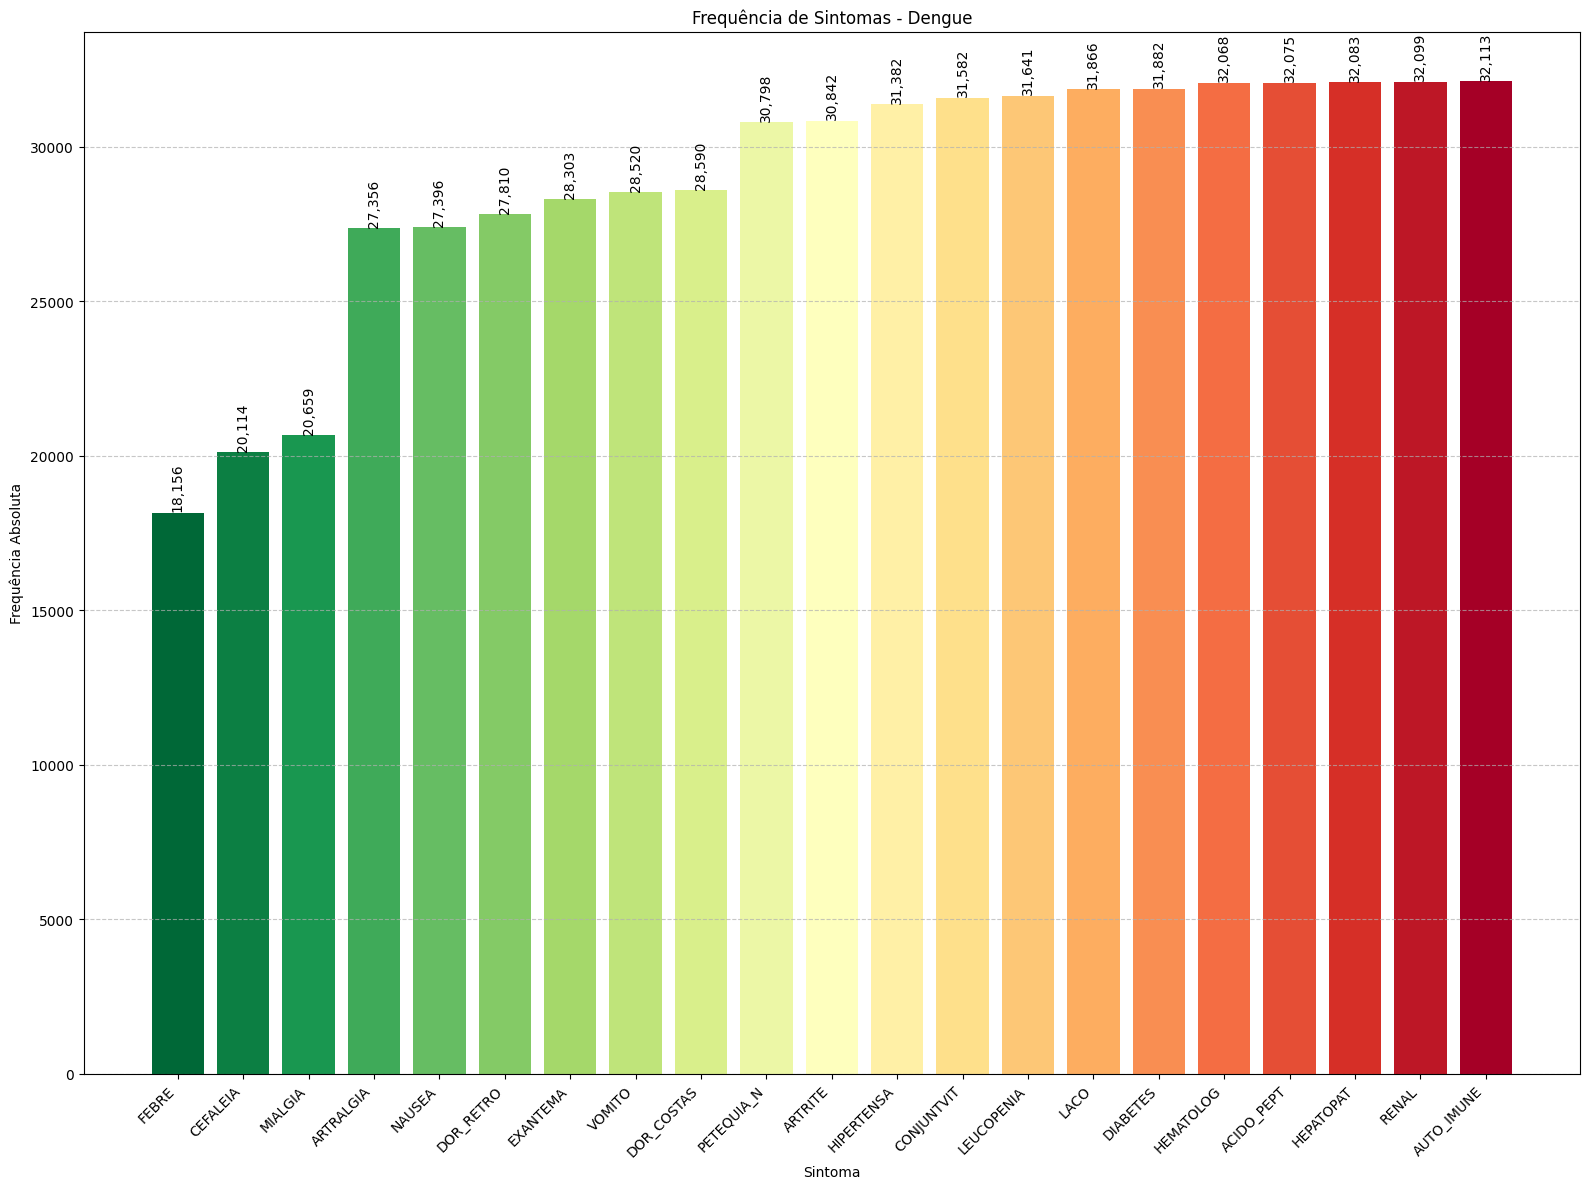

In [ ]:
# Plotar o gráfico de barras
plt.figure(figsize=(16, 12))
bars = plt.bar(tabela_frequencias['Sintoma'], tabela_frequencias['Frequência Absoluta'], color=plt.cm.RdYlGn(np.linspace(1, 0, len(tabela_frequencias))))

# Adicionar rótulos com os números
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50, f'{bar.get_height():,.0f}', ha='center', va='bottom', rotation=90)

# Configurações adicionais
plt.title('Frequência de Sintomas - Dengue')
plt.xlabel('Sintoma')
plt.ylabel('Frequência Absoluta')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [ ]:
# Selecionar as colunas relevantes
colunas_chikungunya = ['DT_CHIK_S1', 'DT_CHIK_S2', 'DT_PRNT', 'RES_CHIKS1', 'RES_CHIKS2']

# Visualizar as primeiras linhas das colunas
print(df[colunas_chikungunya].head())


  DT_CHIK_S1  DT_CHIK_S2 DT_PRNT  RES_CHIKS1  RES_CHIKS2
0        NaN         NaN     NaN         NaN         NaN
1        NaN         NaN     NaN         NaN         NaN
2        NaN         NaN     NaN         NaN         NaN
3        NaN         NaN     NaN         NaN         NaN
4        NaN         NaN     NaN         NaN         NaN


In [ ]:
# Contar valores nulos de cada coluna
valores_nulos = df[colunas_chikungunya].isna().sum()
print("Valores nulos de cada coluna:")
print(valores_nulos)

# Valores distintos de cada coluna
valores_distintos = df[colunas_chikungunya].apply(lambda x: x.unique())
print("\nValores distintos de cada coluna:")
print(valores_distintos)


Valores nulos de cada coluna:
DT_CHIK_S1    38517
DT_CHIK_S2    38569
DT_PRNT       38564
RES_CHIKS1    38463
RES_CHIKS2    38476
dtype: int64

Valores distintos de cada coluna:
DT_CHIK_S1    [nan, 2016-04-20, 2016-04-19, 2016-05-06, 2017...
DT_CHIK_S2                                                [nan]
DT_PRNT       [nan, 2017-01-19, 2017-07-11, 2019-10-04, 2019...
RES_CHIKS1                                 [nan, 4.0, 2.0, 1.0]
RES_CHIKS2                                      [nan, 4.0, 2.0]
dtype: object


In [ ]:
print(df['RESUL_PRNT'].head())


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: RESUL_PRNT, dtype: float64


In [ ]:
valores_distintos = df['RESUL_PRNT'].unique()
print("Valores distintos de RESUL_PRNT:")
print(valores_distintos)


Valores distintos de RESUL_PRNT:
[nan  4.  2.]


In [ ]:
# Criar DataFrame com as informações
dados_dt_soro = {
    'Coluna': ['DT_SORO', 'RESUL_SORO'],
    'Valores Distintos': [df['DT_SORO'].unique(), df['RESUL_SORO'].unique()],
    'Quantidade de NaN': [df['DT_SORO'].isna().sum(), df['RESUL_SORO'].isna().sum()]
}

# Exibir o DataFrame
tabela_resultados = pd.DataFrame(dados_dt_soro)
print(tabela_resultados)


       Coluna                                  Valores Distintos  \
0     DT_SORO  [nan, 2013-01-22, 2013-01-07, 2013-01-24, 2013...   
1  RESUL_SORO                          [nan, 4.0, 1.0, 3.0, 2.0]   

   Quantidade de NaN  
0              30689  
1              17837  


In [ ]:
# Selecionar as colunas relevantes
colunas = ['DT_NS1', 'RESUL_NS1', 'DT_VIRAL', 'RESUL_VI_N', 'DT_PCR', 'RESUL_PCR_', 'SOROTIPO', 'HISTOPA_N', 'IMUNOH_N', 'HOSPITALIZ', 'DT_INTERNA']

# Inicializar um dicionário para armazenar os resultados
dados = {'Coluna': [], 'Valores Distintos': [], 'Quantidade de NaN': []}

# Preencher o dicionário com os valores distintos e a quantidade de NaN de cada coluna
for coluna in colunas:
    dados['Coluna'].append(coluna)
    dados['Valores Distintos'].append(df[coluna].unique())
    dados['Quantidade de NaN'].append(df[coluna].isna().sum())

# Criar o DataFrame com os resultados
tabela_resultados = pd.DataFrame(dados)

# Exibir o DataFrame
print(tabela_resultados)


        Coluna                                  Valores Distintos  \
0       DT_NS1  [nan, 2013-02-14, 2013-01-07, 2013-01-08, 2013...   
1    RESUL_NS1                          [nan, 4.0, 2.0, 1.0, 3.0]   
2     DT_VIRAL  [nan, 2013-01-14, 2013-01-15, 2013-01-18, 2013...   
3   RESUL_VI_N                          [nan, 4.0, 2.0, 1.0, 3.0]   
4       DT_PCR  [nan, 2013-04-04, 2013-10-16, 2014-03-07, 2014...   
5   RESUL_PCR_                          [nan, 4.0, 3.0, 2.0, 1.0]   
6     SOROTIPO                               [nan, 4.0, 1.0, 2.0]   
7    HISTOPA_N                          [nan, 4.0, 3.0, 2.0, 1.0]   
8     IMUNOH_N                          [nan, 4.0, 3.0, 2.0, 1.0]   
9   HOSPITALIZ                               [2.0, nan, 1.0, 9.0]   
10  DT_INTERNA  [nan, 2013-01-03, 2013-01-04, 2013-01-08, 2013...   

    Quantidade de NaN  
0               35723  
1               20603  
2               38197  
3               21079  
4               38362  
5               21355  
6  

In [ ]:
print(df['UF'].head())


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: UF, dtype: float64


In [ ]:
valores_distintos_uf = df['UF'].unique()
print(valores_distintos_uf)


[nan 29. 53. 17. 26. 31. 32. 52. 28. 35.]


In [ ]:
# Colunas de interesse
colunas_interesse = ['TPAUTOCTO', 'COUFINF', 'COPAISINF', 'CLASSI_FIN', 'CRITERIO', 'DOENCA_TRA', 'CLINC_CHIK', 'EVOLUCAO']

# Dicionário para armazenar os resultados
resultados = {}

# Iterar sobre as colunas de interesse
for coluna in colunas_interesse:
    # Valores distintos
    valores_distintos = df[coluna].unique()

    # Contagem de valores NaN
    valores_nan = df[coluna].isnull().sum()

    # Adicionar resultados ao dicionário
    resultados[coluna] = {'Valores Distintos': valores_distintos, 'Valores NaN': valores_nan}

# Exibir os resultados
for coluna, info in resultados.items():
    print(f'Coluna: {coluna}')
    print(f'Valores Distintos: {info["Valores Distintos"]}')
    print(f'Valores NaN: {info["Valores NaN"]}')
    print()


Coluna: TPAUTOCTO
Valores Distintos: [ 2. nan  1.  3.]
Valores NaN: 26393

Coluna: COUFINF
Valores Distintos: [29. nan 31. 35. 53. 17. 52. 26.]
Valores NaN: 27726

Coluna: COPAISINF
Valores Distintos: [ 1. nan]
Valores NaN: 27727

Coluna: CLASSI_FIN
Valores Distintos: [ 8.  1.  5. nan  2.  3. 10. 11. 12.]
Valores NaN: 103

Coluna: CRITERIO
Valores Distintos: [nan  3.  2.  1.]
Valores NaN: 12487

Coluna: DOENCA_TRA
Valores Distintos: [ 2. nan  9.  1.]
Valores NaN: 32771

Coluna: CLINC_CHIK
Valores Distintos: [nan  1.  2.]
Valores NaN: 38458

Coluna: EVOLUCAO
Valores Distintos: [nan  1.  9.  3.  4.  2.]
Valores NaN: 14657



In [ ]:
# Visualizar as primeiras linhas da coluna DT_OBITO
print(df['DT_OBITO'].head())


0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: DT_OBITO, dtype: object


In [ ]:
# Encontrar o índice da primeira linha preenchida da coluna DT_OBITO
primeiro_indice = df['DT_OBITO'].first_valid_index()

# Acessar o valor da primeira linha preenchida da coluna DT_OBITO
primeira_data_obito = df.loc[primeiro_indice, 'DT_OBITO']

print("Primeira linha preenchida da coluna DT_OBITO:", primeira_data_obito)


Primeira linha preenchida da coluna DT_OBITO: 2013-02-13


In [ ]:
from datetime import datetime

# Remover linhas onde a data de óbito é nula
df_obitos = df.dropna(subset=['DT_OBITO'])

# Converter as colunas de data para o tipo datetime
df_obitos['DT_NASC'] = pd.to_datetime(df_obitos['DT_NASC'])
df_obitos['DT_OBITO'] = pd.to_datetime(df_obitos['DT_OBITO'])

# Calcular a idade das pessoas no momento do óbito
df_obitos['Idade'] = (df_obitos['DT_OBITO'] - df_obitos['DT_NASC']).astype('<m8[Y]')

# Adicionar um título à tabela
print("Tabela de Ocorrências de Óbitos:")
# Exibir todas as ocorrências
print(df_obitos[['DT_NASC', 'DT_OBITO', 'Idade']])




Tabela de Ocorrências de Óbitos:
         DT_NASC   DT_OBITO  Idade
937   2013-01-03 2013-02-13    0.0
5030  1963-07-27 2013-04-12   49.0
6845  1970-08-25 2013-05-24   42.0
7337  1982-12-19 2013-07-09   30.0
7584  1936-02-25 2013-08-09   77.0
8187  1993-01-06 2014-01-04   20.0
8443  1981-07-06 2014-02-24   32.0
8528  1996-11-03 2014-03-11   17.0
8783  1980-10-21 2014-04-08   33.0
9412  1973-09-25 2014-05-15   40.0
9984  1990-06-03 2014-08-08   24.0
11005 1983-07-24 2015-03-07   31.0
15331 1982-03-14 2015-07-07   33.0
17353 1927-07-10 2015-11-29   88.0
18699 2009-08-26 2016-01-30    6.0
19295 1976-09-15 2016-02-23   39.0
22019 1972-10-08 2016-08-14   43.0
24351 1958-09-26 2016-04-24   57.0
25558 1980-01-18 2016-08-19   36.0
26819 1966-07-10 2017-03-15   50.0
27310 1960-12-10 2017-06-25   56.0
27711 1944-09-13 2017-10-30   73.0
28368 1919-02-06 2018-04-21   99.0
28619 1966-02-09 2018-05-21   52.0
28989 1955-04-27 2018-08-16   63.0
29375 2009-07-17 2018-12-29    9.0
29416 1995-12-25 2019-

<ipython-input-136-d36697792473>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obitos['DT_NASC'] = pd.to_datetime(df_obitos['DT_NASC'])
<ipython-input-136-d36697792473>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obitos['DT_OBITO'] = pd.to_datetime(df_obitos['DT_OBITO'])
<ipython-input-136-d36697792473>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

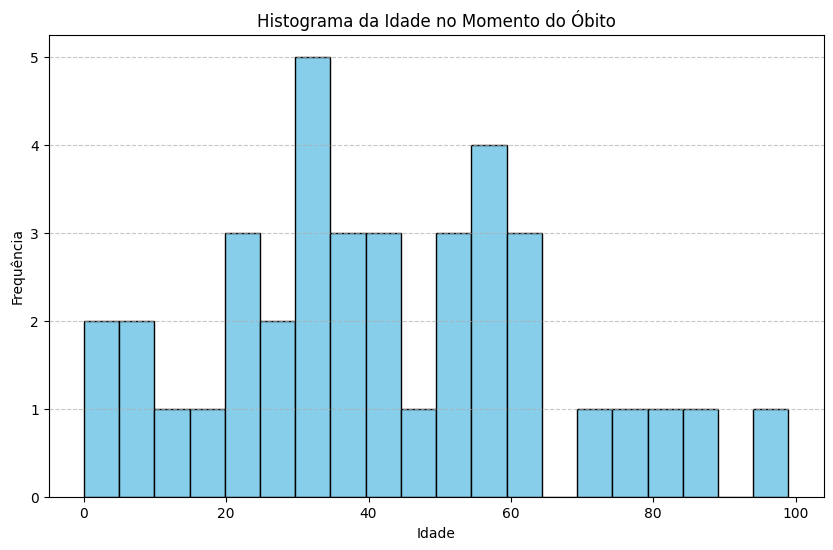

Tabela de Ocorrências de Óbitos:
         DT_NASC   DT_OBITO  Idade
937   2013-01-03 2013-02-13    0.0
5030  1963-07-27 2013-04-12   49.0
6845  1970-08-25 2013-05-24   42.0
7337  1982-12-19 2013-07-09   30.0
7584  1936-02-25 2013-08-09   77.0
8187  1993-01-06 2014-01-04   20.0
8443  1981-07-06 2014-02-24   32.0
8528  1996-11-03 2014-03-11   17.0
8783  1980-10-21 2014-04-08   33.0
9412  1973-09-25 2014-05-15   40.0
9984  1990-06-03 2014-08-08   24.0
11005 1983-07-24 2015-03-07   31.0
15331 1982-03-14 2015-07-07   33.0
17353 1927-07-10 2015-11-29   88.0
18699 2009-08-26 2016-01-30    6.0
19295 1976-09-15 2016-02-23   39.0
22019 1972-10-08 2016-08-14   43.0
24351 1958-09-26 2016-04-24   57.0
25558 1980-01-18 2016-08-19   36.0
26819 1966-07-10 2017-03-15   50.0
27310 1960-12-10 2017-06-25   56.0
27711 1944-09-13 2017-10-30   73.0
28368 1919-02-06 2018-04-21   99.0
28619 1966-02-09 2018-05-21   52.0
28989 1955-04-27 2018-08-16   63.0
29375 2009-07-17 2018-12-29    9.0
29416 1995-12-25 2019-

In [ ]:
import matplotlib.pyplot as plt

# Plotar o histograma da idade no momento do óbito
plt.figure(figsize=(10, 6))
plt.hist(df_obitos['Idade'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma da Idade no Momento do Óbito')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Adicionar um título à tabela
print("Tabela de Ocorrências de Óbitos:")
# Exibir todas as ocorrências
print(df_obitos[['DT_NASC', 'DT_OBITO', 'Idade']])


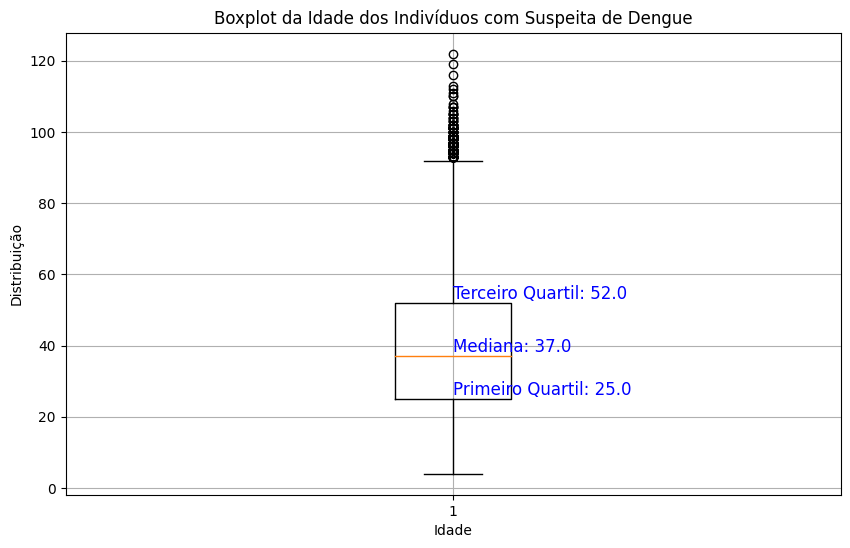

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Criar uma figura e eixos para o gráfico
plt.figure(figsize=(10, 6))

# Plotar o boxplot da idade no momento do óbito
plt.boxplot(df['Idade'])

# Adicionar título e rótulos aos eixos
plt.title('Boxplot da Idade dos Indivíduos com Suspeita de Dengue')
plt.xlabel('Idade')
plt.ylabel('Distribuição')

# Adicionar rótulos aos quartis
quartis = np.percentile(df['Idade'], [25, 50, 75])
plt.text(1, quartis[0], f'Primeiro Quartil: {quartis[0]}', color='blue', fontsize=12, verticalalignment='bottom')
plt.text(1, quartis[1], f'Mediana: {quartis[1]}', color='blue', fontsize=12, verticalalignment='bottom')
plt.text(1, quartis[2], f'Terceiro Quartil: {quartis[2]}', color='blue', fontsize=12, verticalalignment='bottom')

# Exibir o boxplot
plt.grid(True)
plt.show()


In [ ]:
# Calcular a média da idade
media_idade = df['Idade'].mean()

# Calcular a mediana da idade
mediana_idade = df['Idade'].median()

# Calcular os quartis da idade
primeiro_quartil = df['Idade'].quantile(0.25)
terceiro_quartil = df['Idade'].quantile(0.75)

# Exibir os resultados
print("Média da Idade:", media_idade)
print("Mediana da Idade:", mediana_idade)
print("Primeiro Quartil:", primeiro_quartil)
print("Terceiro Quartil:", terceiro_quartil)


Média da Idade: 39.41128885892815
Mediana da Idade: 37.0
Primeiro Quartil: 25.0
Terceiro Quartil: 52.0


In [ ]:
# Filtrar o DataFrame para as linhas onde DT_OBITO está preenchido
df_obito = df[df['DT_OBITO'].notna()]

# Exibir as primeiras linhas do DataFrame resultante
print(df_obito)


       NU_NOTIFIC                       ID_PESSOA  \
937         22515  292660-292660-2013-01-03-F-4.0   
5030        38005  291905-291905-1963-07-27-M-4.0   
6845        31046  291490-291360-1970-08-25-M-2.0   
7337        28714  291080-291080-1982-12-19-M-4.0   
7584        18895  291080-291080-1936-02-25-F-4.0   
8187        30723  292740-292740-1993-01-06-F-4.0   
8443         3654  291800-291800-1981-07-06-M-4.0   
8528        12014  291430-291800-1996-11-03-M-4.0   
8783        18984  290250-290320-1980-10-21-M-4.0   
9412        18675  292740-292740-1973-09-25-F-9.0   
9984        35834  292740-292740-1990-06-03-M-4.0   
11005        2638  291080-291080-1983-07-24-M-4.0   
15331        4947  292950-292950-1982-03-14-F-4.0   
17353        8873  291480-291480-1927-07-10-M-9.0   
18699       37280  291535-261160-2009-08-26-F-4.0   
19295       30384  291360-291360-1976-09-15-F-4.0   
22019       35537  292380-292380-1972-10-08-F-4.0   
24351       13964  292000-292000-1958-09-26-F-

In [ ]:
# Contar o número de ocorrências para cada idade
contagem_por_idade = df_obito['Idade'].value_counts().sort_index()

# Exibir um count por idade
print("Count por Idade:")
print(contagem_por_idade)

Count por Idade:
8      1
11     1
14     2
17     1
27     1
28     1
30     1
31     2
33     1
40     1
41     1
42     3
43     1
44     1
47     1
50     1
51     1
53     1
57     1
58     1
59     1
60     2
63     2
65     1
67     1
68     2
79     1
86     1
88     1
96     1
105    1
Name: Idade, dtype: int64


In [ ]:
# Converter as idades para o tipo inteiro
df_obito['Idade'] = df_obito['Idade'].astype(int)

# Agrupar as idades em faixas de 5 em 5 anos
faixa_etaria = pd.cut(df_obito['Idade'], bins=range(0, df_obito['Idade'].max() + 6, 5), right=False)

# Contar o número de óbitos em cada faixa etária
obitos_por_faixa_etaria = faixa_etaria.value_counts().sort_index()

# Exibir o número de óbitos por faixa etária
print("Óbitos por Faixa Etária (5 em 5 anos):")
print(obitos_por_faixa_etaria)



Óbitos por Faixa Etária (5 em 5 anos):
[0, 5)        0
[5, 10)       1
[10, 15)      3
[15, 20)      1
[20, 25)      0
[25, 30)      2
[30, 35)      4
[35, 40)      0
[40, 45)      7
[45, 50)      1
[50, 55)      3
[55, 60)      3
[60, 65)      4
[65, 70)      4
[70, 75)      0
[75, 80)      1
[80, 85)      0
[85, 90)      2
[90, 95)      0
[95, 100)     1
[100, 105)    0
[105, 110)    1
Name: Idade, dtype: int64


<ipython-input-153-7e42e91a398f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obito['Idade'] = df_obito['Idade'].astype(int)


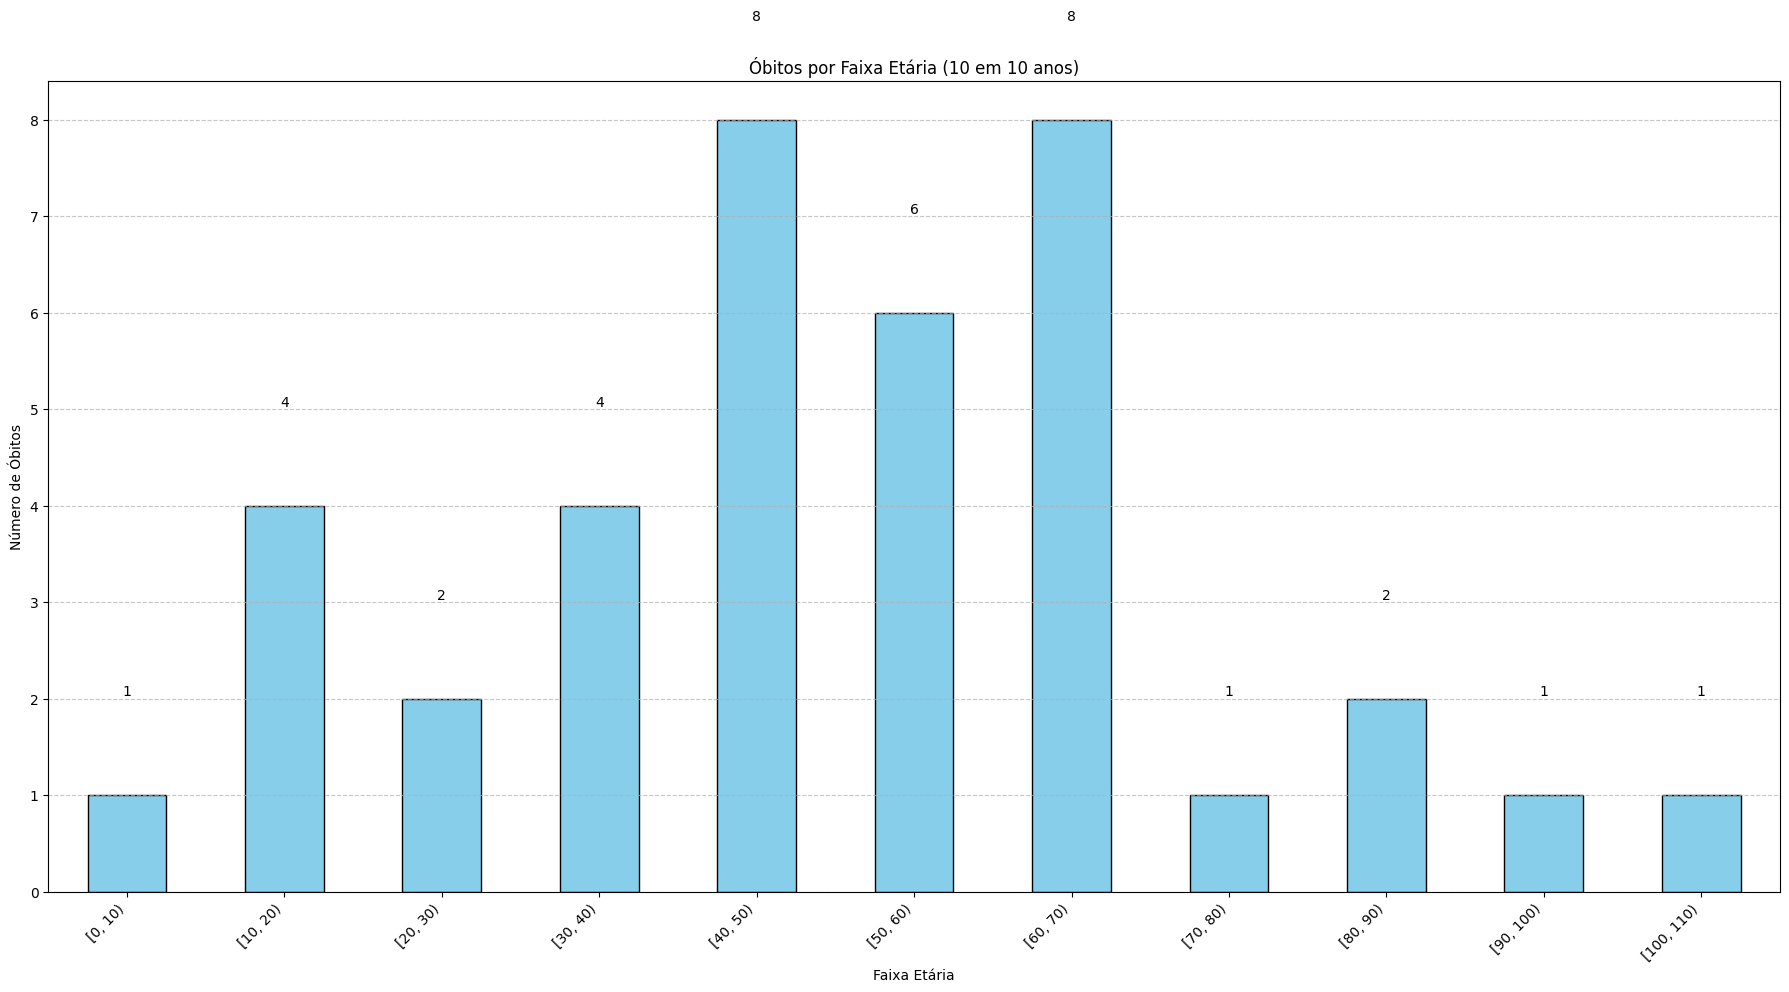

In [ ]:
# Agrupar as idades em faixas de 10 em 10 anos
faixa_etaria_10_anos = pd.cut(df_obito['Idade'], bins=range(0, df_obito['Idade'].max() + 11, 10), right=False)

# Contar o número de óbitos em cada faixa etária
obitos_por_faixa_etaria_10_anos = faixa_etaria_10_anos.value_counts().sort_index()

# Plotar o gráfico de barras
plt.figure(figsize=(18, 10))
obitos_por_faixa_etaria_10_anos.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Óbitos por Faixa Etária (10 em 10 anos)')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Óbitos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos com os números
for i, valor in enumerate(obitos_por_faixa_etaria_10_anos):
    plt.text(i, valor + 1, str(valor), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
print(df['DT_ENCERRA'].head())


0    2013-03-02
1    2013-03-03
2    2013-03-20
3    2013-03-22
4    2013-03-22
Name: DT_ENCERRA, dtype: object


In [ ]:
print(df[['ALRM_HIPOT', 'ALRM_PLAQ', 'ALRM_VOM', 'ALRM_SANG', 'ALRM_HEMAT', 'ALRM_ABDOM', 'ALRM_LETAR', 'ALRM_HEPAT', 'ALRM_LIQ']].head())


   ALRM_HIPOT  ALRM_PLAQ  ALRM_VOM  ALRM_SANG  ALRM_HEMAT  ALRM_ABDOM  \
0         NaN        NaN       NaN        NaN         NaN         NaN   
1         NaN        NaN       NaN        NaN         NaN         NaN   
2         NaN        NaN       NaN        NaN         NaN         NaN   
3         NaN        NaN       NaN        NaN         NaN         NaN   
4         NaN        NaN       NaN        NaN         NaN         NaN   

   ALRM_LETAR  ALRM_HEPAT  ALRM_LIQ  
0         NaN         NaN       NaN  
1         NaN         NaN       NaN  
2         NaN         NaN       NaN  
3         NaN         NaN       NaN  
4         NaN         NaN       NaN  


In [ ]:
# Selecionar as colunas relevantes
colunas_alarmes = ['ALRM_HIPOT', 'ALRM_PLAQ', 'ALRM_VOM', 'ALRM_SANG', 'ALRM_HEMAT', 'ALRM_ABDOM', 'ALRM_LETAR', 'ALRM_HEPAT', 'ALRM_LIQ']

# Inicializar um dicionário para armazenar os resultados
resultados = {'Coluna': [], 'Valores Distintos': [], 'NaN': []}

# Iterar sobre as colunas
for coluna in colunas_alarmes:
    # Obter valores distintos
    valores_distintos = df[coluna].dropna().unique()
    # Contar valores NaN
    nan_count = df[coluna].isna().sum()
    # Adicionar os resultados ao dicionário
    resultados['Coluna'].append(coluna)
    resultados['Valores Distintos'].append(valores_distintos)
    resultados['NaN'].append(nan_count)

# Criar um DataFrame com os resultados
tabela_resultados = pd.DataFrame(resultados)

# Exibir a tabela
print("Tabela de Valores Distintos e Contagem de NaN:")
print(tabela_resultados)


Tabela de Valores Distintos e Contagem de NaN:
       Coluna Valores Distintos    NaN
0  ALRM_HIPOT        [2.0, 1.0]  38285
1   ALRM_PLAQ        [1.0, 2.0]  38285
2    ALRM_VOM        [2.0, 1.0]  38285
3   ALRM_SANG        [2.0, 1.0]  38284
4  ALRM_HEMAT        [2.0, 1.0]  38285
5  ALRM_ABDOM        [2.0, 1.0]  38285
6  ALRM_LETAR        [1.0, 2.0]  38285
7  ALRM_HEPAT        [2.0, 1.0]  38284
8    ALRM_LIQ        [2.0, 1.0]  38284


In [ ]:
print(df['DT_ALRM'].head())


0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: DT_ALRM, dtype: object


In [ ]:
primeira_linha_preenchida = df['DT_ALRM'].dropna().iloc[0]
print(primeira_linha_preenchida)


2015-06-10


In [ ]:
colunas_gravidade = ['GRAV_PULSO', 'GRAV_CONV', 'GRAV_ENCH', 'GRAV_INSUF', 'GRAV_TAQUI', 'GRAV_EXTRE',
                     'GRAV_HIPOT', 'GRAV_HEMAT', 'GRAV_MELEN', 'GRAV_METRO', 'GRAV_SANG', 'GRAV_AST',
                     'GRAV_MIOC', 'GRAV_CONSC', 'GRAV_ORGAO']

# Visualizar as primeiras linhas das colunas de gravidade
print(df[colunas_gravidade].head())


   GRAV_PULSO  GRAV_CONV  GRAV_ENCH  GRAV_INSUF  GRAV_TAQUI  GRAV_EXTRE  \
0         NaN        NaN        NaN         NaN         NaN         NaN   
1         NaN        NaN        NaN         NaN         NaN         NaN   
2         NaN        NaN        NaN         NaN         NaN         NaN   
3         NaN        NaN        NaN         NaN         NaN         NaN   
4         NaN        NaN        NaN         NaN         NaN         NaN   

   GRAV_HIPOT  GRAV_HEMAT  GRAV_MELEN  GRAV_METRO  GRAV_SANG  GRAV_AST  \
0         NaN         NaN         NaN         NaN        NaN       NaN   
1         NaN         NaN         NaN         NaN        NaN       NaN   
2         NaN         NaN         NaN         NaN        NaN       NaN   
3         NaN         NaN         NaN         NaN        NaN       NaN   
4         NaN         NaN         NaN         NaN        NaN       NaN   

   GRAV_MIOC  GRAV_CONSC  GRAV_ORGAO  
0        NaN         NaN         NaN  
1        NaN         NaN  

In [ ]:
# Lista das colunas de gravidade
colunas_gravidade = ['GRAV_PULSO', 'GRAV_CONV', 'GRAV_ENCH', 'GRAV_INSUF', 'GRAV_TAQUI', 'GRAV_EXTRE',
                     'GRAV_HIPOT', 'GRAV_HEMAT', 'GRAV_MELEN', 'GRAV_METRO', 'GRAV_SANG', 'GRAV_AST',
                     'GRAV_MIOC', 'GRAV_CONSC', 'GRAV_ORGAO']

# Dicionário para armazenar os resultados
resultados = {}

# Loop sobre as colunas
for coluna in colunas_gravidade:
    # Valores distintos
    valores_distintos = df[coluna].unique()
    # Quantidade de NaN
    qtd_nan = df[coluna].isna().sum()
    # Adicionar ao dicionário de resultados
    resultados[coluna] = {'Valores Distintos': valores_distintos, 'NaN': qtd_nan}

# Exibir os resultados
for coluna, info in resultados.items():
    print(f"Coluna: {coluna}")
    print(f"Valores Distintos: {info['Valores Distintos']}")
    print(f"Quantidade de NaN: {info['NaN']}")
    print()


Coluna: GRAV_PULSO
Valores Distintos: [nan  2.]
Quantidade de NaN: 38556

Coluna: GRAV_CONV
Valores Distintos: [nan  2.  1.]
Quantidade de NaN: 38555

Coluna: GRAV_ENCH
Valores Distintos: [nan  2.  1.]
Quantidade de NaN: 38555

Coluna: GRAV_INSUF
Valores Distintos: [nan  2.  1.]
Quantidade de NaN: 38555

Coluna: GRAV_TAQUI
Valores Distintos: [nan  2.  1.]
Quantidade de NaN: 38555

Coluna: GRAV_EXTRE
Valores Distintos: [nan  2.  1.]
Quantidade de NaN: 38555

Coluna: GRAV_HIPOT
Valores Distintos: [nan  2.  1.]
Quantidade de NaN: 38555

Coluna: GRAV_HEMAT
Valores Distintos: [nan  2.  1.]
Quantidade de NaN: 38555

Coluna: GRAV_MELEN
Valores Distintos: [nan  1.  2.]
Quantidade de NaN: 38555

Coluna: GRAV_METRO
Valores Distintos: [nan  2.  1.]
Quantidade de NaN: 38555

Coluna: GRAV_SANG
Valores Distintos: [nan  2.]
Quantidade de NaN: 38555

Coluna: GRAV_AST
Valores Distintos: [nan  2.]
Quantidade de NaN: 38555

Coluna: GRAV_MIOC
Valores Distintos: [nan  2.]
Quantidade de NaN: 38555

Coluna: 

In [ ]:
# Encontrar a primeira linha não NaN da coluna DT_GRAV
primeira_linha_preenchida = df['DT_GRAV'].dropna().iloc[0]

print("Primeira linha preenchida da coluna DT_GRAV:")
print(primeira_linha_preenchida)


Primeira linha preenchida da coluna DT_GRAV:
2016-08-05


In [ ]:
colunas = ['MANI_HEMOR', 'EPISTAXE', 'GENGIVO', 'METRO', 'PETEQUIAS', 'HEMATURA',
           'SANGRAM', 'LACO_N', 'PLASMATICO', 'EVIDENCIA', 'PLAQ_MENOR', 'CON_FHD',
           'COMPLICA', 'TP_SISTEMA', 'NDUPLIC_N', 'CS_FLXRET', 'FLXRECEBI']

# Visualizar as primeiras linhas das colunas
print(df[colunas].head())


   MANI_HEMOR  EPISTAXE  GENGIVO  METRO  PETEQUIAS  HEMATURA  SANGRAM  LACO_N  \
0         NaN       NaN      NaN    NaN        NaN       NaN      NaN     NaN   
1         NaN       NaN      NaN    NaN        NaN       NaN      NaN     NaN   
2         NaN       NaN      NaN    NaN        NaN       NaN      NaN     NaN   
3         NaN       NaN      NaN    NaN        NaN       NaN      NaN     NaN   
4         NaN       NaN      NaN    NaN        NaN       NaN      NaN     NaN   

   PLASMATICO  EVIDENCIA  PLAQ_MENOR  CON_FHD  COMPLICA  TP_SISTEMA  \
0         NaN        NaN         NaN      NaN       NaN         2.0   
1         NaN        NaN         NaN      NaN       NaN         2.0   
2         NaN        NaN         NaN      NaN       NaN         NaN   
3         NaN        NaN         NaN      NaN       NaN         NaN   
4         NaN        NaN         NaN      NaN       NaN         NaN   

   NDUPLIC_N  CS_FLXRET  FLXRECEBI  
0        NaN        0.0        NaN  
1        NaN

In [ ]:
# Listar as colunas
colunas = ['MANI_HEMOR', 'EPISTAXE', 'GENGIVO', 'METRO', 'PETEQUIAS', 'HEMATURA',
           'SANGRAM', 'LACO_N', 'PLASMATICO', 'EVIDENCIA', 'PLAQ_MENOR', 'CON_FHD',
           'COMPLICA', 'TP_SISTEMA', 'NDUPLIC_N', 'CS_FLXRET', 'FLXRECEBI']

# Inicializar um dicionário para armazenar os resultados
resultados = {}

# Iterar sobre as colunas
for coluna in colunas:
    # Valores distintos
    valores_distintos = df[coluna].unique()

    # Contagem de valores nulos
    valores_nulos = df[coluna].isnull().sum()

    # Armazenar os resultados no dicionário
    resultados[coluna] = {'Valores Distintos': valores_distintos, 'Valores Nulos': valores_nulos}

# Exibir os resultados
for coluna, info in resultados.items():
    print(f"Coluna: {coluna}")
    print(f"Valores Distintos: {info['Valores Distintos']}")
    print(f"Número de Valores Nulos: {info['Valores Nulos']}")
    print()


Coluna: MANI_HEMOR
Valores Distintos: [nan  2.  9.  1.]
Número de Valores Nulos: 38542

Coluna: EPISTAXE
Valores Distintos: [nan  1.  2.]
Número de Valores Nulos: 38561

Coluna: GENGIVO
Valores Distintos: [nan  2.  1.]
Número de Valores Nulos: 38561

Coluna: METRO
Valores Distintos: [nan  1.  2.]
Número de Valores Nulos: 38561

Coluna: PETEQUIAS
Valores Distintos: [nan  9.  2.  1.]
Número de Valores Nulos: 38561

Coluna: HEMATURA
Valores Distintos: [nan  2.  1.]
Número de Valores Nulos: 38561

Coluna: SANGRAM
Valores Distintos: [nan  2.  1.]
Número de Valores Nulos: 38561

Coluna: LACO_N
Valores Distintos: [nan  2.  1.  9.]
Número de Valores Nulos: 38561

Coluna: PLASMATICO
Valores Distintos: [nan  1.  9.  2.]
Número de Valores Nulos: 38548

Coluna: EVIDENCIA
Valores Distintos: [nan  2.  1.  3.]
Número de Valores Nulos: 38561

Coluna: PLAQ_MENOR
Valores Distintos: [    nan  30000.  62000.  12000. 183000.  20100.  47000.   4000.  53000.
  86000.  32000.  15000.]
Número de Valores Nulos:

In [ ]:
# Contar quantas linhas da coluna PLAQ_MENOR não são NaN
total_linhas_sem_nan = df['PLAQ_MENOR'].count()

print("Número de linhas em PLAQ_MENOR sem NaN:", total_linhas_sem_nan)




Número de linhas em PLAQ_MENOR sem NaN: 11


In [ ]:
# Filtrar as linhas onde a coluna PLAQ_MENOR não é NaN
plaquetas = df[df['PLAQ_MENOR'].notna()]

# Verificar se há 11 ocorrências
if len(plaquetas) >= 11:
    # Selecionar as primeiras 11 ocorrências
    plaquetas = plaquetas.head(11)
    print("Dataset 'plaquetas' criado com sucesso:")
    print(plaquetas)
else:
    print("Não há pelo menos 11 ocorrências na coluna 'PLAQ_MENOR'.")


Dataset 'plaquetas' criado com sucesso:
       NU_NOTIFIC                       ID_PESSOA  \
245         38038  292040-291800-1997-05-10-M-4.0   
334          9643  290460-290460-2009-05-02-M-1.0   
2607        12118  290687-290687-1972-12-04-F-1.0   
4142        10570  292670-292670-1974-07-02-M-1.0   
5719        24863  291080-291080-1993-09-21-F-4.0   
5739         4999  291750-291750-2012-06-11-F-4.0   
6922        20629  292740-292740-1957-01-28-M-9.0   
7337        28714  291080-291080-1982-12-19-M-4.0   
7656        24932  290670-290670-1950-02-07-M-3.0   
8187        30723  292740-292740-1993-01-06-F-4.0   
10254       23578  292740-291920-1968-11-12-M-4.0   

                                        NOME  COMUNINF  ID_MN_RESI  \
245     OSVALDO PIRES RIBEIRO MACIEL BARBOSA  292040.0      292040   
334                      MARIO SIQUEIRA CRUZ  290460.0      290460   
2607     AMELIA MOTA SANTOS GOMES NASCIMENTO  290687.0      290687   
4142                   SEBASTIAO LUCIA LUCI

In [ ]:
import pandas as pd

# Supondo que você tenha um DataFrame chamado df

# Filtrar as linhas onde PLAQ_MENOR não é NaN
df_preenchido = df.dropna(subset=['PLAQ_MENOR'])

# Definir as faixas de classificação
faixas = {
    'Trombocitopenia Grave': (0, 10000),
    'Risco de Problemas Graves': (80000, 100000),
    'Valor de Referência': (150000, 450000)
}

# Adicionar uma nova coluna com a classificação
df_preenchido['Classificação'] = pd.cut(df_preenchido['PLAQ_MENOR'], bins=[faixa[0] for faixa in faixas.values()] + [float('inf')], labels=faixas.keys(), right=False)

# Exibir o DataFrame com a classificação
print(df_preenchido[['PLAQ_MENOR', 'Classificação']])



       PLAQ_MENOR              Classificação
245       30000.0      Trombocitopenia Grave
334       62000.0      Trombocitopenia Grave
2607      12000.0      Trombocitopenia Grave
4142     183000.0        Valor de Referência
5719      20100.0      Trombocitopenia Grave
5739      47000.0      Trombocitopenia Grave
6922       4000.0      Trombocitopenia Grave
7337      53000.0      Trombocitopenia Grave
7656      86000.0  Risco de Problemas Graves
8187      32000.0      Trombocitopenia Grave
10254     15000.0      Trombocitopenia Grave


<ipython-input-161-7d87a1a9d20d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preenchido['Classificação'] = pd.cut(df_preenchido['PLAQ_MENOR'], bins=[faixa[0] for faixa in faixas.values()] + [float('inf')], labels=faixas.keys(), right=False)


In [ ]:
# Filtrar as linhas onde a coluna DT_OBITO não é nula
obitos_preenchidos = df_preenchido.dropna(subset=['DT_OBITO'])

# Exibir as linhas onde DT_OBITO foi preenchida
print(obitos_preenchidos[['PLAQ_MENOR', 'Classificação', 'Idade', 'DT_OBITO']])



      PLAQ_MENOR          Classificação  Idade   DT_OBITO
7337     53000.0  Trombocitopenia Grave     41 2013-07-09
8187     32000.0  Trombocitopenia Grave     31 2014-01-04


In [ ]:
# Valor mínimo de PLAQ_MENOR
valor_minimo_plaquetas = plaquetas['PLAQ_MENOR'].min()

# Valor máximo de PLAQ_MENOR
valor_maximo_plaquetas = plaquetas['PLAQ_MENOR'].max()

print("Valor Mínimo de PLAQ_MENOR:", valor_minimo_plaquetas)
print("Valor Máximo de PLAQ_MENOR:", valor_maximo_plaquetas)


Valor Mínimo de PLAQ_MENOR: 4000.0
Valor Máximo de PLAQ_MENOR: 183000.0


In [ ]:
# Selecionar as colunas desejadas
colunas = ['NOME DO MUNICÍPIO', 'POPULAÇÃO ESTIMADA 2020', 'POPULAÇÃO ESTIMADA 2019',
           'POPULAÇÃO ESTIMADA 2018', 'POPULAÇÃO ESTIMADA 2017', 'POPULAÇÃO ESTIMADA 2016',
           'POPULAÇÃO ESTIMADA 2015', 'POPULAÇÃO ESTIMADA 2014', 'POPULAÇÃO ESTIMADA 2013',
           'POPULAÇÃO ESTIMADA 2012', 'POPULAÇÃO ESTIMADA 2011', 'MUN_HOSP', 'UF_HOSP',
           'MUN_SAUDENOT', 'UF_SAUDENOT', 'MUNI_RESI', 'UF_RESI', 'MUN_INFEC', 'UF_INFEC',
           'IDADE', 'SEM_PRI_V']

# Exibir as primeiras linhas com as colunas selecionadas
print(df[colunas].head())


  NOME DO MUNICÍPIO  POPULAÇÃO ESTIMADA 2020  POPULAÇÃO ESTIMADA 2019  \
0            Jequié                   156126                   155966   
1            Jequié                   156126                   155966   
2           Lajedão                     3975                     3955   
3       Tanque Novo                    17443                    17366   
4       Tanque Novo                    17443                    17366   

   POPULAÇÃO ESTIMADA 2018  POPULAÇÃO ESTIMADA 2017  POPULAÇÃO ESTIMADA 2016  \
0                   155800                   162209                   161880   
1                   155800                   162209                   161880   
2                     3934                     4068                     4046   
3                    17285                    17884                    17797   
4                    17285                    17884                    17797   

   POPULAÇÃO ESTIMADA 2015  POPULAÇÃO ESTIMADA 2014  POPULAÇÃO ESTIMADA 2013  \


In [ ]:
# Contar o número de ocorrências de cada município na coluna DT_OBITO
contagem_obitos_por_municipio = df.groupby('NOME DO MUNICÍPIO')['DT_OBITO'].count()

# Encontrar os municípios com a maior contagem de óbitos
maiores_contagens = contagem_obitos_por_municipio.nlargest(10)

# Exibir os municípios com a maior contagem de óbitos e suas populações estimadas
print("Municípios com a maior contagem de óbitos:")
print(df.loc[df['NOME DO MUNICÍPIO'].isin(maiores_contagens.index),
             ['NOME DO MUNICÍPIO', 'POPULAÇÃO ESTIMADA 2020', 'POPULAÇÃO ESTIMADA 2019',
              'POPULAÇÃO ESTIMADA 2018', 'POPULAÇÃO ESTIMADA 2017', 'POPULAÇÃO ESTIMADA 2016',
              'POPULAÇÃO ESTIMADA 2015', 'POPULAÇÃO ESTIMADA 2014', 'POPULAÇÃO ESTIMADA 2013',
              'POPULAÇÃO ESTIMADA 2012', 'POPULAÇÃO ESTIMADA 2011']])


Municípios com a maior contagem de óbitos:
      NOME DO MUNICÍPIO  POPULAÇÃO ESTIMADA 2020  POPULAÇÃO ESTIMADA 2019  \
12               Ilhéus                   159923                   162327   
28              Brumado                    67335                    67195   
30     Feira de Santana                   619609                   614872   
48             Salvador                  2886698                  2872347   
53     Feira de Santana                   619609                   614872   
...                 ...                      ...                      ...   
38564  Feira de Santana                   619609                   614872   
38565          Salvador                  2886698                  2872347   
38566          Salvador                  2886698                  2872347   
38567          Salvador                  2886698                  2872347   
38568          Salvador                  2886698                  2872347   

       POPULAÇÃO ESTIMADA 2018  

In [ ]:
# Contar o número de ocorrências de cada município na coluna DT_OBITO
contagem_obitos_por_municipio = df.groupby('NOME DO MUNICÍPIO')['DT_OBITO'].count()

# Encontrar os municípios com a maior contagem de óbitos
maiores_contagens = contagem_obitos_por_municipio.nlargest(10)

# Filtrar o DataFrame para incluir apenas os municípios com as maiores contagens de óbitos
municipios_maiores_contagens = df[df['NOME DO MUNICÍPIO'].isin(maiores_contagens.index)]

# Criar um quadro onde as linhas são as variáveis e as colunas são a frequência absoluta
quadro_frequencia_absoluta = municipios_maiores_contagens.pivot_table(index='NOME DO MUNICÍPIO', columns='DT_OBITO', aggfunc='size', fill_value=0)

# Exibir o quadro
print(quadro_frequencia_absoluta)


DT_OBITO           2013-07-09  2013-08-09  2014-01-04  2014-03-11  2014-04-08  \
NOME DO MUNICÍPIO                                                               
Anguera                     0           0           0           0           0   
Baianópolis                 0           0           0           0           1   
Brumado                     0           0           0           0           0   
Camaçari                    0           0           0           0           0   
Candeias                    0           0           0           0           0   
Eunápolis                   0           0           0           0           0   
Feira de Santana            1           1           0           0           0   
Ilhéus                      0           0           0           0           0   
Iramaia                     0           0           0           1           0   
Salvador                    0           0           1           0           0   

DT_OBITO           2014-05-

In [ ]:
# Filtrar o DataFrame para incluir apenas as linhas com DT_OBITO não nulo
df_obitos = df.dropna(subset=['DT_OBITO'])

# Agrupar por município e ano, contar o número de ocorrências e redefinir o índice para que 'DT_OBITO' seja uma coluna novamente
contagem_obitos_por_municipio_ano = df_obitos.groupby(['NOME DO MUNICÍPIO', df_obitos['DT_OBITO'].dt.year]).size().reset_index(name='Contagem')

# Exibir o DataFrame resultante
print(contagem_obitos_por_municipio_ano)


              NOME DO MUNICÍPIO  DT_OBITO  Contagem
0                       Anguera      2019         1
1                   Baianópolis      2014         1
2                       Brumado      2017         1
3                      Camaçari      2017         1
4                      Camaçari      2019         1
5                      Candeias      2016         1
6                     Eunápolis      2019         1
7              Feira de Santana      2013         2
8              Feira de Santana      2015         1
9              Feira de Santana      2019         2
10                       Ilhéus      2016         1
11                       Ilhéus      2018         1
12                      Iramaia      2014         1
13                      Itabuna      2015         1
14                      Itacaré      2013         1
15            Itaguaçu da Bahia      2016         1
16                       Jequié      2014         1
17            Lajedo do Tabocal      2013         1
18  Livramen

In [ ]:
# Criar a coluna 'OBITO' com base na presença de valores na coluna 'DT_OBITO'
df['OBITO'] = df['DT_OBITO'].apply(lambda x: 'SIM' if pd.notnull(x) else 'NÃO')



In [ ]:
# Exibir as primeiras linhas do DataFrame com a nova coluna 'OBITO'
print(df[['DT_OBITO', 'OBITO']].head())

  DT_OBITO OBITO
0      NaT   NÃO
1      NaT   NÃO
2      NaT   NÃO
3      NaT   NÃO
4      NaT   NÃO


In [ ]:
# Filtrar o DataFrame original para selecionar apenas as linhas onde OBITO é igual a 'SIM'
obito = df[df['OBITO'] == 'SIM']

# Exibir o novo DataFrame
print(obito)


       NU_NOTIFIC                       ID_PESSOA  \
937         22515  292660-292660-2013-01-03-F-4.0   
5030        38005  291905-291905-1963-07-27-M-4.0   
6845        31046  291490-291360-1970-08-25-M-2.0   
7337        28714  291080-291080-1982-12-19-M-4.0   
7584        18895  291080-291080-1936-02-25-F-4.0   
8187        30723  292740-292740-1993-01-06-F-4.0   
8443         3654  291800-291800-1981-07-06-M-4.0   
8528        12014  291430-291800-1996-11-03-M-4.0   
8783        18984  290250-290320-1980-10-21-M-4.0   
9412        18675  292740-292740-1973-09-25-F-9.0   
9984        35834  292740-292740-1990-06-03-M-4.0   
11005        2638  291080-291080-1983-07-24-M-4.0   
15331        4947  292950-292950-1982-03-14-F-4.0   
17353        8873  291480-291480-1927-07-10-M-9.0   
18699       37280  291535-261160-2009-08-26-F-4.0   
19295       30384  291360-291360-1976-09-15-F-4.0   
22019       35537  292380-292380-1972-10-08-F-4.0   
24351       13964  292000-292000-1958-09-26-F-

In [ ]:
# Criar a matriz de correlação
correlation_matrix = obito.corr()

# Exibir a matriz de correlação
print(correlation_matrix)


                NU_NOTIFIC  COMUNINF  ID_MN_RESI  ID_MUNICIP  MUNICIPIO  \
NU_NOTIFIC        1.000000 -0.419129   -0.123942   -0.178912  -0.233544   
COMUNINF         -0.419129  1.000000    1.000000    0.266169   0.348666   
ID_MN_RESI       -0.123942  1.000000    1.000000    0.234746   0.284135   
ID_MUNICIP       -0.178912  0.266169    0.234746    1.000000   1.000000   
MUNICIPIO        -0.233544  0.348666    0.284135    1.000000   1.000000   
...                    ...       ...         ...         ...        ...   
UF_INFEC               NaN       NaN         NaN         NaN        NaN   
IDADE            -0.014953  0.011545   -0.039505   -0.181228  -0.206756   
SEM_PRI_V        -0.065323  0.357975    0.149229    0.357708   0.426637   
Idade            -0.026791 -0.022582   -0.088882   -0.198358  -0.239700   
Idade_no_obito   -0.032505  0.015038   -0.076198   -0.177609  -0.218581   

                TP_NOT   SEM_NOT    NU_ANO  SG_UF_NOT  ID_REGIONA  ...  \
NU_NOTIFIC         NaN -0

<ipython-input-178-bf3625816d66>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = obito.corr()


In [ ]:
# Carregue o arquivo CSV em um DataFrame, especificando o separador como ';'
df = pd.read_csv('/content/sample_data/dengue.csv', sep=';')

# Visualize as primeiras 5 linhas do DataFrame
print(df.head())


   NU_NOTIFIC                       ID_PESSOA  \
0       10110  291800-291800-1982-06-23-M-4.0   
1        1994  291800-291800-1984-07-26-M-4.0   
2        5321  291890-291890-1988-06-22-F-2.0   
3       15811  293105-293105-2004-12-29-F-2.0   
4       23461  293105-293105-1961-01-25-M-2.0   

                                       NOME  COMUNINF  ID_MN_RESI  ID_MUNICIP  \
0        ALBERTO GARCIA MACIEL FILHO AGUIAR  290060.0      291800      291800   
1                    MARCIO RIBEIRO FONSECA       NaN      291800      291800   
2      SOLANGE MOREIRA SANTOS CARDOSO ASSIS  291890.0      291890      291890   
3                     PATRICIA BORGES ROCHA  293105.0      293105      293105   
4  WALTER AMARAL RIBEIRO RODRIGUES PINHEIRO  293105.0      293105      293105   

   MUNICIPIO  TP_NOT ID_AGRAVO  DT_NOTIFIC  ...  MUN_HOSP  UF_HOSP  \
0        NaN       2       A90  2012-12-31  ...       NaN      NaN   
1        NaN       2       A90  2013-01-01  ...       NaN      NaN   
2       

<ipython-input-54-c4c76c5239d4>:2: DtypeWarning: Columns (27,49,51,88,104) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/sample_data/dengue.csv', sep=';')


In [ ]:
# Contagem de cada condição na coluna 'Agravo/doença'
contagem_condicoes = df['ID_AGRAVO'].value_counts()

df['ID_AGRAVO'].unique()

array(['A90'], dtype=object)

Renomeando Variáveis:

In [ ]:
# Convertendo a coluna 'Data da Investigação' para o formato de data
df['Data da Investigação'] = pd.to_datetime(df['Data da Investigação'])

# Encontrar o menor valor de data
menor_data = df['Data da Investigação'].min()

# Encontrar o maior valor de data
maior_data = df['Data da Investigação'].max()

# Exibir os resultados
print("Menor data de investigação:", menor_data)
print("Maior data de investigação:", maior_data)




Menor data de investigação: 2012-12-31 00:00:00
Maior data de investigação: 2020-02-17 00:00:00


In [ ]:
# Carregue o arquivo CSV em um DataFrame, especificando o separador como ';'
df = pd.read_csv('/content/sample_data/dengue.csv', sep=';')


<ipython-input-59-921ac0f65d98>:2: DtypeWarning: Columns (27,49,51,88,104) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/sample_data/dengue.csv', sep=';')


In [ ]:
# Renomeando a coluna
df.rename(columns={'FEBRE': 'Sinais clínicos (Febre)'}, inplace=True)

# Mapeando os valores para significados mais claros
df['Sinais clínicos (Febre)'] = df['Sinais clínicos (Febre)'].map({1: 'Sim', 2: 'Não Informar'})

# Calculando a contagem de cada condição
contagem_febre = df['Sinais clínicos (Febre)'].value_counts()

# Calculando o total de entradas
total_entradas = len(df)


# Exibindo os resultados
print("Contagem de cada condição para Sinais clínicos (Febre):")
print(contagem_febre)





Contagem de cada condição para Sinais clínicos (Febre):
Sim             14008
Não Informar     2074
Name: Sinais clínicos (Febre), dtype: int64

Porcentagem de cada condição em relação ao total:
Sim             36.319324
Não Informar     5.377376
Name: Sinais clínicos (Febre), dtype: float64


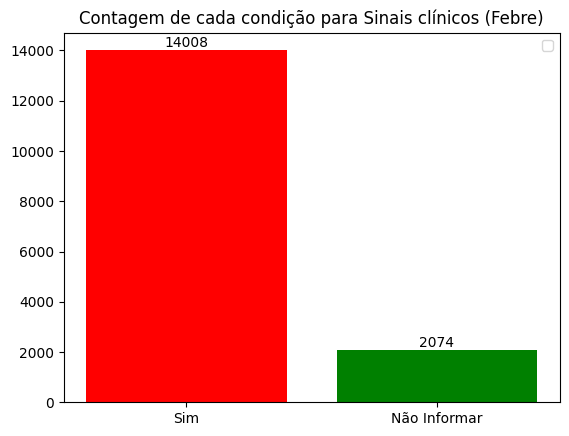

In [ ]:
import matplotlib.pyplot as plt

# Dados
condicoes = ['Sim', 'Não Informar']
contagem = [14008, 2074]

# Criar o gráfico de barras
bars = plt.bar(condicoes, contagem, color=['red', 'green'])

# Adicionar rótulos aos valores das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Adicionar legenda
plt.legend()

# Adicionar título
plt.title('Contagem de cada condição para Sinais clínicos (Febre)')

# Exibir o gráfico
plt.show()



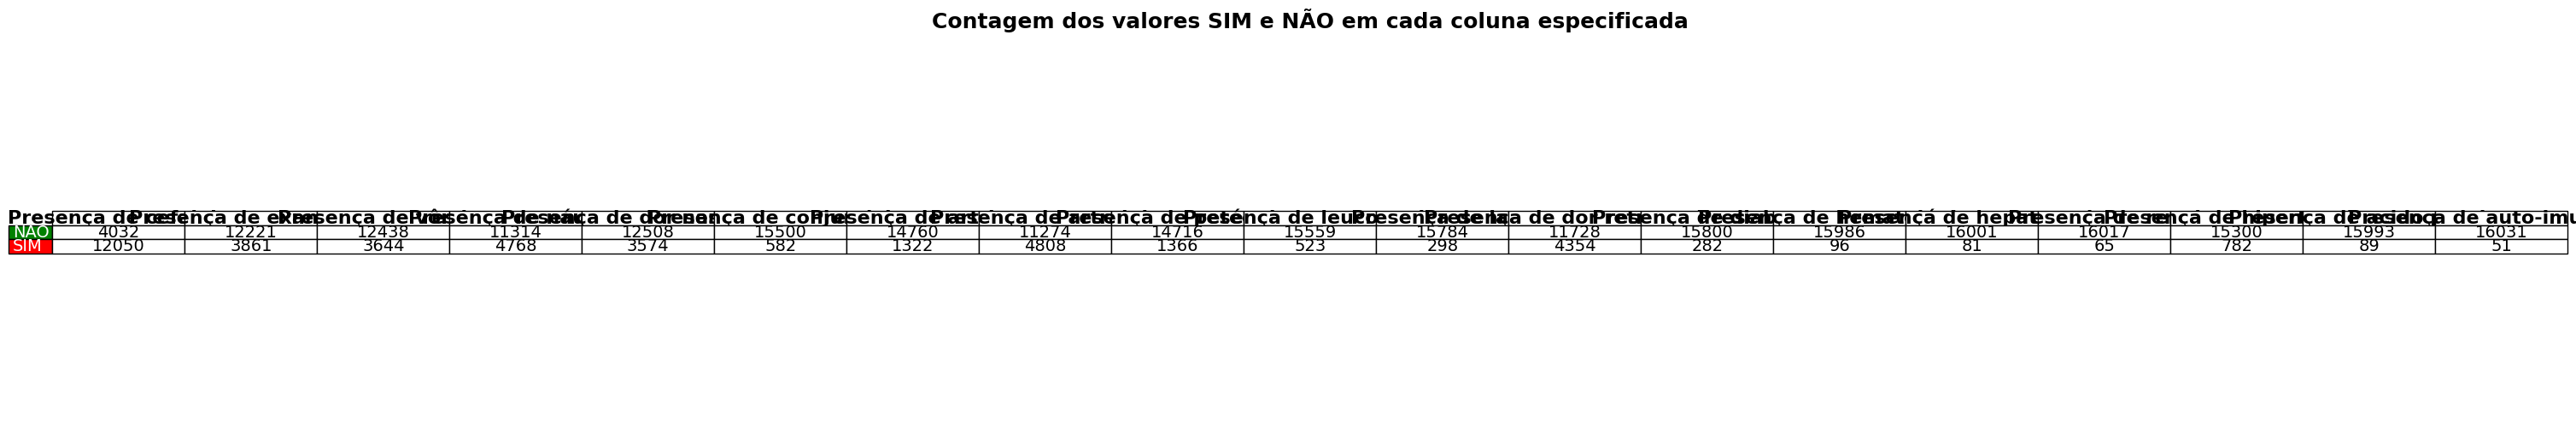

Tabela salva como tabela_contagem.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Supondo que 'df' seja o seu DataFrame
# Renomeando apenas as colunas especificadas do DataFrame
colunas_a_renomear = {'CEFALEIA': 'Presença de cefaleia',
                      'EXANTEMA': 'Presença de exantema',
                      'VOMITO': 'Presença de vômito',
                      'NAUSEA': 'Presença de náusea',
                      'DOR_COSTAS': 'Presença de dor nas costas',
                      'CONJUNTVIT': 'Presença de conjuntivite',
                      'ARTRITE': 'Presença de artrite',
                      'ARTRALGIA': 'Presença de artralgia',
                      'PETEQUIA_N': 'Presença de petéquias',
                      'LEUCOPENIA': 'Presença de leucopenia',
                      'LACO': 'Presença de laco',
                      'DOR_RETRO': 'Presença de dor retroocular',
                      'DIABETES': 'Presença de diabetes',
                      'HEMATOLOG': 'Presença de hematológico',
                      'HEPATOPAT': 'Presença de hepatopatia',
                      'RENAL': 'Presença de renal',
                      'HIPERTENSA': 'Presença de hipertensão',
                      'ACIDO_PEPT': 'Presença de acido peptico',
                      'AUTO_IMUNE': 'Presença de auto-imunidade'}

df.rename(columns=colunas_a_renomear, inplace=True)

# Contando os valores 'SIM' e 'NÃO' em cada coluna especificada
contagem_valores = {}
for coluna in colunas_a_renomear.values():
    contagem_valores[coluna] = df[coluna].value_counts()

# Convertendo o dicionário para um DataFrame
tabela_contagem = pd.DataFrame(contagem_valores)

# Criando uma figura e eixo para a tabela
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')  # Remover os eixos

# Criando a tabela e estilizando
tabela = table(ax, tabela_contagem, loc='center', cellLoc='center', colWidths=[0.2]*len(tabela_contagem.columns))
tabela.auto_set_font_size(False)
tabela.set_fontsize(14)  # Alterando o tamanho da fonte

# Aplicando a formatação das cores
for key, cell in tabela.get_celld().items():
    if key[0] == 0:  # Se for o cabeçalho
        cell.set_text_props(weight='bold', color='black', size=16)  # Alterando tamanho e peso da fonte
    elif 'SIM' in cell.get_text().get_text():
        cell.set_facecolor('red')
        cell.set_text_props(color='white', size=14)  # Alterando cor e tamanho da fonte
    elif 'NÃO' in cell.get_text().get_text():
        cell.set_facecolor('green')
        cell.set_text_props(color='white', size=14)  # Alterando cor e tamanho da fonte

# Adicionando um título
plt.title('Contagem dos valores SIM e NÃO em cada coluna especificada', fontsize=18, weight='bold')  # Título maior

# Salvando a figura como uma imagem PNG
nome_arquivo = 'tabela_contagem.png'
plt.savefig(nome_arquivo, bbox_inches='tight', pad_inches=0.5)
plt.show()

print(f"Tabela salva como {nome_arquivo}")


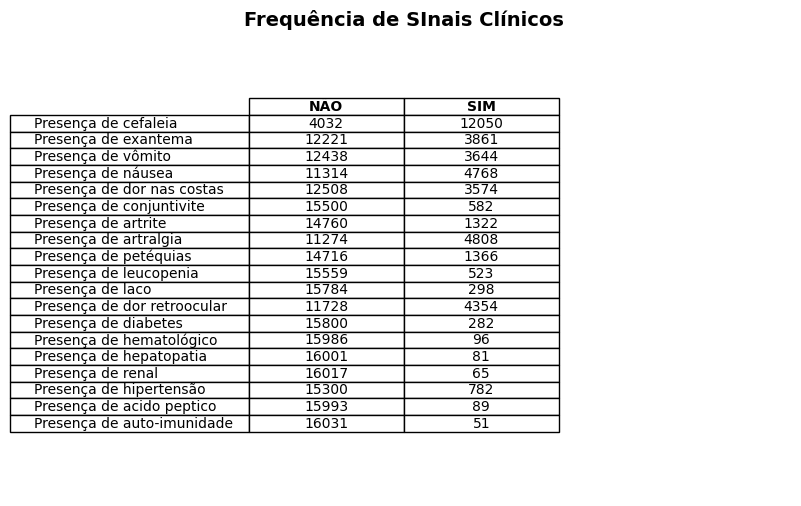

Tabela salva como tabela_contagem.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Supondo que 'df' seja o seu DataFrame
# Renomeando apenas as colunas especificadas do DataFrame
colunas_a_renomear = {'CEFALEIA': 'Presença de cefaleia',
                      'EXANTEMA': 'Presença de exantema',
                      'VOMITO': 'Presença de vômito',
                      'NAUSEA': 'Presença de náusea',
                      'DOR_COSTAS': 'Presença de dor nas costas',
                      'CONJUNTVIT': 'Presença de conjuntivite',
                      'ARTRITE': 'Presença de artrite',
                      'ARTRALGIA': 'Presença de artralgia',
                      'PETEQUIA_N': 'Presença de petéquias',
                      'LEUCOPENIA': 'Presença de leucopenia',
                      'LACO': 'Presença de laco',
                      'DOR_RETRO': 'Presença de dor retroocular',
                      'DIABETES': 'Presença de diabetes',
                      'HEMATOLOG': 'Presença de hematológico',
                      'HEPATOPAT': 'Presença de hepatopatia',
                      'RENAL': 'Presença de renal',
                      'HIPERTENSA': 'Presença de hipertensão',
                      'ACIDO_PEPT': 'Presença de acido peptico',
                      'AUTO_IMUNE': 'Presença de auto-imunidade'}

df.rename(columns=colunas_a_renomear, inplace=True)

# Mapeando os valores 1 para 'SIM' e 2 para 'NÃO'
for coluna in colunas_a_renomear.values():
    df[coluna] = df[coluna].map({1: 'SIM', 2: 'NÃO'})

# Contando os valores 'SIM' e 'NÃO' em cada coluna especificada
contagem_valores = {}
for coluna in colunas_a_renomear.values():
    contagem_valores[coluna] = df[coluna].value_counts()

# Convertendo o dicionário para um DataFrame e transpondo
tabela_contagem = pd.DataFrame(contagem_valores).T

# Criando uma figura e eixo para a tabela
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')  # Remover os eixos

# Criando a tabela e estilizando
tabela = table(ax, tabela_contagem, loc='center', cellLoc='center', colWidths=[0.2]*len(tabela_contagem.columns))
tabela.auto_set_font_size(False)
tabela.set_fontsize(10)

# Aplicando a formatação das cores
for key, cell in tabela.get_celld().items():
    if key[0] == 0:  # Se for o cabeçalho
        cell.set_text_props(weight='bold', color='black')
    elif 'SIM' in cell.get_text().get_text():
        cell.set_facecolor('red')
    elif 'NÃO' in cell.get_text().get_text():
        cell.set_facecolor('green')

# Adicionando um título
plt.title('Frequência de SInais Clínicos', fontsize=14, weight='bold')

# Salvando a figura como uma imagem PNG
nome_arquivo = 'tabela_contagem.png'
plt.savefig(nome_arquivo, bbox_inches='tight', pad_inches=0.5)
plt.show()

print(f"Tabela salva como {nome_arquivo}")



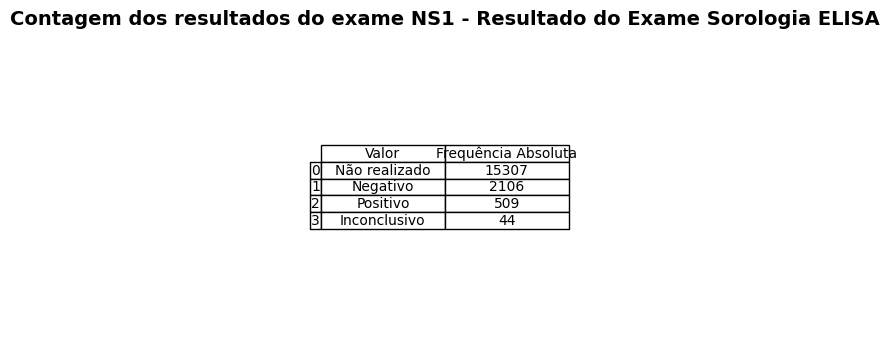

Tabela salva como tabela_contagem_NS1.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Supondo que 'df' seja o seu DataFrame
# Renomeando apenas a coluna 'RESUL_NS1'
colunas_a_renomear = {'RESUL_NS1': 'Resultado do exame NS1 (1-Positivo 2-Negativo 3-Inconclusivo 4-Não realizado)'}
df.rename(columns=colunas_a_renomear, inplace=True)

# Contando os valores na coluna 'Resultado do exame NS1'
contagem_valores = df['Resultado do exame NS1 (1-Positivo 2-Negativo 3-Inconclusivo 4-Não realizado)'].value_counts()

# Convertendo a contagem de valores em um DataFrame
tabela_contagem = pd.DataFrame({'Valor': contagem_valores.index, 'Frequência Absoluta': contagem_valores.values})

# Mapeando os valores para seus significados
mapeamento = {
    1: 'Positivo',
    2: 'Negativo',
    3: 'Inconclusivo',
    4: 'Não realizado'
}
tabela_contagem['Valor'] = tabela_contagem['Valor'].map(mapeamento)

# Calculando o percentual
total_registros = tabela_contagem['Frequência Absoluta'].sum()

# Criando uma figura e eixo para a tabela
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')  # Remover os eixos

# Criando a tabela e estilizando
tabela = table(ax, tabela_contagem, loc='center', cellLoc='center', colWidths=[0.2]*len(tabela_contagem.columns))
tabela.auto_set_font_size(False)
tabela.set_fontsize(10)

# Adicionando um título
plt.title('Contagem dos resultados do exame NS1 - Resultado do Exame Sorologia ELISA', fontsize=14, weight='bold')

# Salvando a figura como uma imagem PNG
nome_arquivo = 'tabela_contagem_NS1.png'
plt.savefig(nome_arquivo, bbox_inches='tight', pad_inches=0.5)
plt.show()

print(f"Tabela salva como {nome_arquivo}")




In [ ]:
# Contando ocorrências dos valores '1' e '2' na coluna 'Sorotipo'
contagem_sorotipo = df['Sorotipo'].dropna().value_counts()

# Exibindo a contagem
print("Contagem dos valores na coluna 'Sorotipo':")
print(contagem_sorotipo)


Contagem dos valores na coluna 'Sorotipo':
1.0    74
4.0    51
2.0    10
Name: Sorotipo, dtype: int64


In [ ]:
# Lista de colunas a serem analisadas
colunas_a_analisar = [
    'RES_CHIKS1',
    'RES_CHIKS2',
    'RESUL_PRNT',
    'RESUL_SORO',
    'RESUL_VI_N',
    'RESUL_PCR_'
]

# Iterando sobre cada coluna e contando os valores distintos
for coluna in colunas_a_analisar:
    contagem_distinta = df[coluna].value_counts(dropna=False)
    print(f"Contagem dos valores na coluna '{coluna}':")
    print(contagem_distinta)
    print()


Contagem dos valores na coluna 'RES_CHIKS1':
NaN    38463
4.0       83
2.0       15
1.0        8
Name: RES_CHIKS1, dtype: int64

Contagem dos valores na coluna 'RES_CHIKS2':
NaN    38476
4.0       90
2.0        3
Name: RES_CHIKS2, dtype: int64

Contagem dos valores na coluna 'RESUL_PRNT':
NaN    38478
4.0       89
2.0        2
Name: RESUL_PRNT, dtype: int64

Contagem dos valores na coluna 'RESUL_SORO':
NaN    17837
4.0    13488
1.0     3583
2.0     3469
3.0      192
Name: RESUL_SORO, dtype: int64

Contagem dos valores na coluna 'RESUL_VI_N':
NaN    21079
4.0    17207
2.0      180
1.0       76
3.0       27
Name: RESUL_VI_N, dtype: int64

Contagem dos valores na coluna 'RESUL_PCR_':
NaN    21355
4.0    16983
2.0      139
1.0       75
3.0       17
Name: RESUL_PCR_, dtype: int64



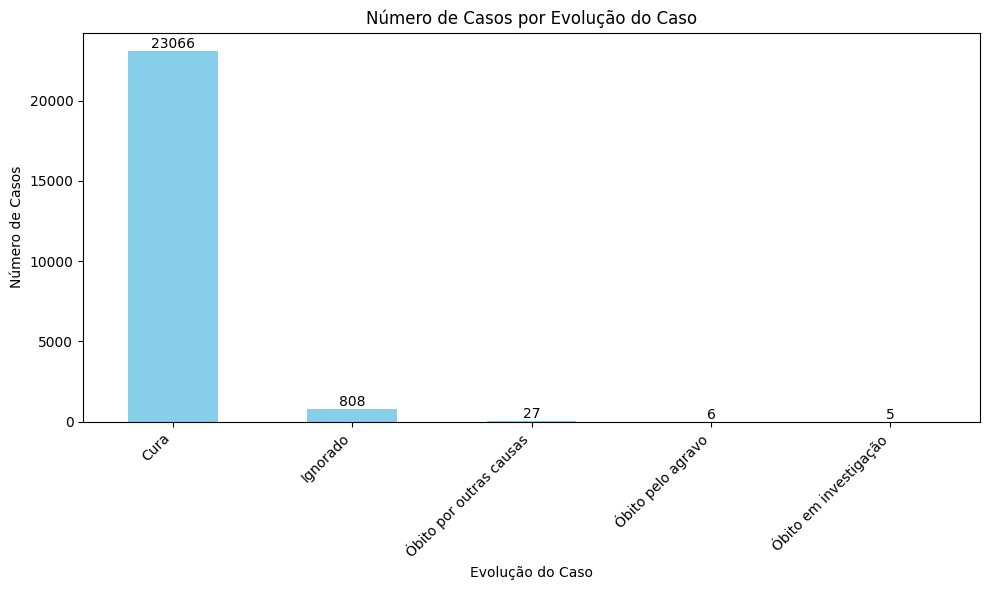

In [ ]:
import matplotlib.pyplot as plt

# Mapeamento dos valores para seus significados
mapeamento_evolucao = {
    1: 'Cura',
    2: 'Óbito pelo agravo',
    3: 'Óbito por outras causas',
    4: 'Óbito em investigação',
    9: 'Ignorado'
}

# Substituindo os valores da coluna 'EVOLUCAO' pelos significados
df['EVOLUCAO'] = df['EVOLUCAO'].map(mapeamento_evolucao)

# Contando o número de ocorrências de cada valor na coluna 'EVOLUCAO'
contagem_evolucao = df['EVOLUCAO'].value_counts()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
contagem_evolucao.plot(kind='bar', color='skyblue')
plt.xlabel('Evolução do Caso')
plt.ylabel('Número de Casos')
plt.title('Número de Casos por Evolução do Caso')
plt.xticks(rotation=45, ha='right')

# Adicionando rótulos numéricos nas barras
for i, value in enumerate(contagem_evolucao):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()




In [ ]:
# Convertendo a coluna 'DT_OBITO' para o tipo de dados de data
df['DT_OBITO'] = pd.to_datetime(df['DT_OBITO'], errors='coerce')

# Encontrar a menor data de óbito
menor_data_obito = df['DT_OBITO'].min()

# Encontrar a maior data de óbito
maior_data_obito = df['DT_OBITO'].max()

print("Menor data de óbito:", menor_data_obito)
print("Maior data de óbito:", maior_data_obito)



Menor data de óbito: 2013-02-13 00:00:00
Maior data de óbito: 2019-10-30 00:00:00


In [ ]:
# Contagem dos valores na coluna 'HOSPITALIZ'
contagem_hospitaliz = df['HOSPITALIZ'].value_counts()

# Exibir a contagem
print(contagem_hospitaliz)


2.0    15371
1.0     1426
9.0      891
Name: HOSPITALIZ, dtype: int64


In [ ]:
# Convertendo a coluna 'DT_INTERNA' para o tipo datetime, se necessário
df['DT_INTERNA'] = pd.to_datetime(df['DT_INTERNA'], errors='coerce')

# Encontrando a menor data
menor_data_internacao = df['DT_INTERNA'].min()

# Encontrando a maior data
maior_data_internacao = df['DT_INTERNA'].max()

# Exibindo os resultados
print("Menor data de internação:", menor_data_internacao)
print("Maior data de internação:", maior_data_internacao)


Menor data de internação: 2010-03-21 00:00:00
Maior data de internação: 2019-12-21 00:00:00


In [ ]:
# Rótulos correspondentes aos valores
rotulos = {
    1: 'Positivo',
    2: 'Negativo',
    3: 'Inconclusivo',
    4: 'Não realizado'
}

# Contagem de cada valor na coluna 'HISTOPA_N'
contagem_histopatologico = df['HISTOPA_N'].map(rotulos).value_counts()

# Contagem de cada valor na coluna 'IMUNOH_N'
contagem_imunohistoquimico = df['IMUNOH_N'].map(rotulos).value_counts()

# Exibindo a contagem de cada valor
print("Contagem de valores na variável 'HISTOPA_N':")
print(contagem_histopatologico)
print("\nContagem de valores na variável 'IMUNOH_N':")
print(contagem_imunohistoquimico)


Contagem de valores na variável 'HISTOPA_N':
Não realizado    16429
Negativo            49
Positivo            27
Inconclusivo        13
Name: HISTOPA_N, dtype: int64

Contagem de valores na variável 'IMUNOH_N':
Não realizado    16471
Negativo            53
Inconclusivo        28
Positivo            17
Name: IMUNOH_N, dtype: int64


In [ ]:
# Convertendo a coluna 'DT_ALRM' para o tipo de dados de data
df['DT_ALRM'] = pd.to_datetime(df['DT_ALRM'], errors='coerce')

# Encontrando a menor data (ignorando os valores nulos)
menor_data = df['DT_ALRM'].dropna().min()

# Encontrando a maior data (ignorando os valores nulos)
maior_data = df['DT_ALRM'].dropna().max()

print("Menor data:", menor_data)
print("Maior data:", maior_data)



Menor data: 2015-06-10 00:00:00
Maior data: 2019-12-19 00:00:00


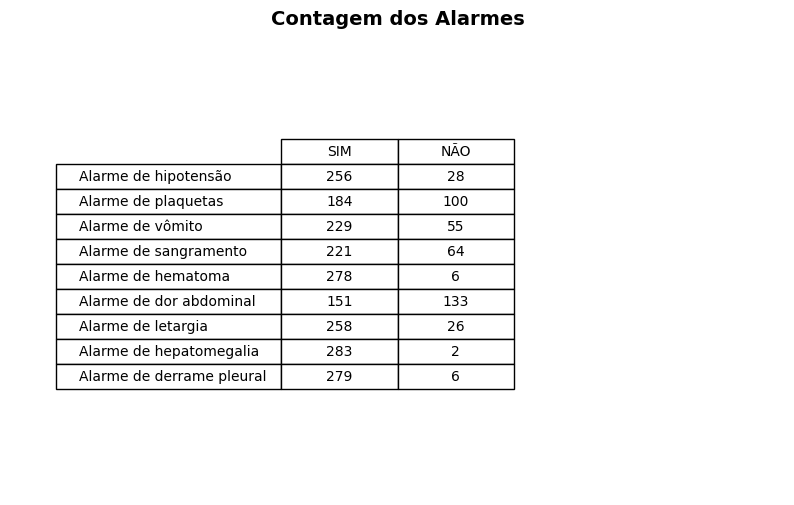

Tabela salva como tabela_contagem_alarmes_invertida.jpg


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista das variáveis de interesse e seus nomes renomeados
variaveis = ['ALRM_HIPOT', 'ALRM_PLAQ', 'ALRM_VOM', 'ALRM_SANG', 'ALRM_HEMAT',
             'ALRM_ABDOM', 'ALRM_LETAR', 'ALRM_HEPAT', 'ALRM_LIQ']
nomes_renomeados = {'ALRM_HIPOT': 'Alarme de hipotensão',
                    'ALRM_PLAQ': 'Alarme de plaquetas',
                    'ALRM_VOM': 'Alarme de vômito',
                    'ALRM_SANG': 'Alarme de sangramento',
                    'ALRM_HEMAT': 'Alarme de hematoma',
                    'ALRM_ABDOM': 'Alarme de dor abdominal',
                    'ALRM_LETAR': 'Alarme de letargia',
                    'ALRM_HEPAT': 'Alarme de hepatomegalia',
                    'ALRM_LIQ': 'Alarme de derrame pleural'}

# Dicionário para armazenar os resultados
resultados = {}

# Loop sobre as variáveis
for variavel in variaveis:
    # Contagem dos valores 'SIM' e 'NÃO'
    contagem = df[variavel].value_counts()
    resultados[nomes_renomeados[variavel]] = contagem

# Criando um DataFrame a partir do dicionário de resultados
tabela_contagem = pd.DataFrame(resultados)

# Renomeando os índices para melhor visualização
tabela_contagem.rename(index={1: 'SIM', 2: 'NÃO'}, inplace=True)

# Transpondo a tabela para inverter linhas e colunas
tabela_contagem = tabela_contagem.T

# Criando a figura e o eixo para a tabela
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')  # Remover os eixos

# Criando a tabela
tabela = ax.table(cellText=tabela_contagem.values, rowLabels=tabela_contagem.index, colLabels=['SIM', 'NÃO'],
                  loc='center', cellLoc='center', colWidths=[0.1, 0.1])

# Estilizando a tabela
tabela.auto_set_font_size(False)
tabela.set_fontsize(10)
tabela.scale(1.5, 1.5)

# Adicionando um título
plt.title('Contagem dos Alarmes', fontsize=14, weight='bold')

# Salvando a figura como uma imagem JPG
nome_arquivo = 'tabela_contagem_alarmes_invertida.jpg'
plt.savefig(nome_arquivo, bbox_inches='tight', pad_inches=0.5)
plt.show()

print(f"Tabela salva como {nome_arquivo}")



In [ ]:
import pandas as pd

# Lista das variáveis de interesse e seus nomes renomeados
variaveis = ['GRAV_PULSO', 'GRAV_CONV', 'GRAV_ENCH', 'GRAV_INSUF', 'GRAV_TAQUI',
             'GRAV_EXTRE', 'GRAV_HIPOT', 'GRAV_HEMAT', 'GRAV_MELEN', 'GRAV_METRO',
             'GRAV_SANG', 'GRAV_AST', 'GRAV_MIOC', 'GRAV_CONSC', 'GRAV_ORGAO']

# Dicionário para armazenar os resultados
resultados = {}

# Loop sobre as variáveis
for variavel in variaveis:
    # Contagem dos valores iguais a 1
    contagem = df[df[variavel] == 1][variavel].count()
    resultados[variavel] = contagem

# Criando um DataFrame a partir do dicionário de resultados
tabela_contagem = pd.DataFrame(resultados, index=['Contagem'])

# Exibindo a tabela de contagem
print(tabela_contagem)


          GRAV_PULSO  GRAV_CONV  GRAV_ENCH  GRAV_INSUF  GRAV_TAQUI  \
Contagem           0          1          1           2           2   

          GRAV_EXTRE  GRAV_HIPOT  GRAV_HEMAT  GRAV_MELEN  GRAV_METRO  \
Contagem           4           2           5           1           2   

          GRAV_SANG  GRAV_AST  GRAV_MIOC  GRAV_CONSC  GRAV_ORGAO  
Contagem          0         0          0           0           1  


In [ ]:
# Convertendo a coluna 'DT_GRAV' para o tipo datetime
df['DT_GRAV'] = pd.to_datetime(df['DT_GRAV'], errors='coerce')

# Encontrando a menor data
menor_data = df['DT_GRAV'].min()

# Encontrando a maior data
maior_data = df['DT_GRAV'].max()

print("Menor data:", menor_data)
print("Maior data:", maior_data)


Menor data: 2016-02-19 00:00:00
Maior data: 2019-08-09 00:00:00


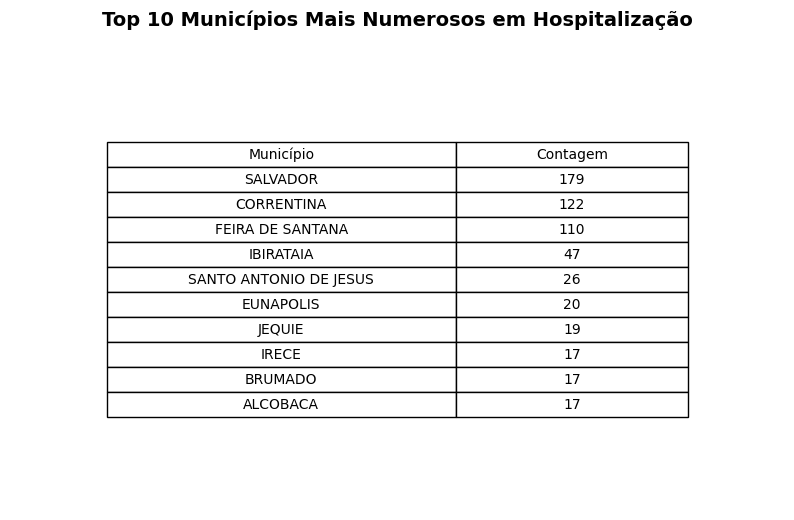

Tabela dos 10 municípios mais numerosos salva como top_10_municipios.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Contagem dos valores distintos na coluna 'MUN_HOSP'
contagem_valores = df['MUN_HOSP'].value_counts()

# Selecionando os 10 valores mais numerosos
top_10_valores = contagem_valores.head(10)

# Criando um DataFrame com os 10 valores mais numerosos
tabela_top_10 = pd.DataFrame({'Município': top_10_valores.index, 'Contagem': top_10_valores.values})

# Criando a figura e o eixo para a tabela
fig, ax = plt.subplots(figsize=(10, 6))

# Removendo os eixos
ax.axis('off')

# Adicionando um título
titulo = 'Top 10 Municípios Mais Numerosos em Hospitalização'
ax.text(0.5, 1.05, titulo, horizontalalignment='center', fontsize=14, fontweight='bold')

# Criando a tabela
tabela = ax.table(cellText=tabela_top_10.values, colLabels=tabela_top_10.columns,
                  loc='center', cellLoc='center', colWidths=[0.3, 0.2])

# Estilizando a tabela
tabela.auto_set_font_size(False)
tabela.set_fontsize(10)
tabela.scale(1.5, 1.5)

# Salvando a figura como uma imagem
nome_arquivo = 'top_10_municipios.png'
plt.savefig(nome_arquivo, bbox_inches='tight', pad_inches=0.5)
plt.show()

print(f"Tabela dos 10 municípios mais numerosos salva como {nome_arquivo}")



In [ ]:
# Lista de municípios em destaque
municipios_destaque = ['SALVADOR', 'CORRENTINA', 'FEIRA DE SANTANA', 'IBIRATAIA', ' SANTO ANTONIO DE JESUS', 'EUNAPOLIS', 'JEQUIE', 'IRECE', 'BRUMADO', 'ALCOBACA']

# Selecionar apenas os dados dos municípios em destaque e as colunas relacionadas à população estimada
populacao_municipios_destaque = df[df['MUN_HOSP'].str.upper().isin(municipios_destaque)][['MUN_HOSP',
                                                                                             'POPULAÇÃO ESTIMADA 2020',
                                                                                             'POPULAÇÃO ESTIMADA 2019',
                                                                                             'POPULAÇÃO ESTIMADA 2018',
                                                                                             'POPULAÇÃO ESTIMADA 2017',
                                                                                             'POPULAÇÃO ESTIMADA 2016',
                                                                                             'POPULAÇÃO ESTIMADA 2015',
                                                                                             'POPULAÇÃO ESTIMADA 2014',
                                                                                             'POPULAÇÃO ESTIMADA 2013',
                                                                                             'POPULAÇÃO ESTIMADA 2012',
                                                                                             'POPULAÇÃO ESTIMADA 2011']]

# Exibir os dados
print(populacao_municipios_destaque)


       MUN_HOSP  POPULAÇÃO ESTIMADA 2020  POPULAÇÃO ESTIMADA 2019  \
136     BRUMADO                    67335                    67195   
172    ALCOBACA                    22490                    22470   
180    ALCOBACA                    22490                    22470   
221    ALCOBACA                    22490                    22470   
245      JEQUIE                    13087                    13240   
...         ...                      ...                      ...   
38421   BRUMADO                    67335                    67195   
38429  SALVADOR                  2886698                  2872347   
38433   BRUMADO                    67335                    67195   
38494  SALVADOR                  2886698                  2872347   
38517  SALVADOR                  2886698                  2872347   

       POPULAÇÃO ESTIMADA 2018  POPULAÇÃO ESTIMADA 2017  \
136                      67048                    69677   
172                      22449                    233

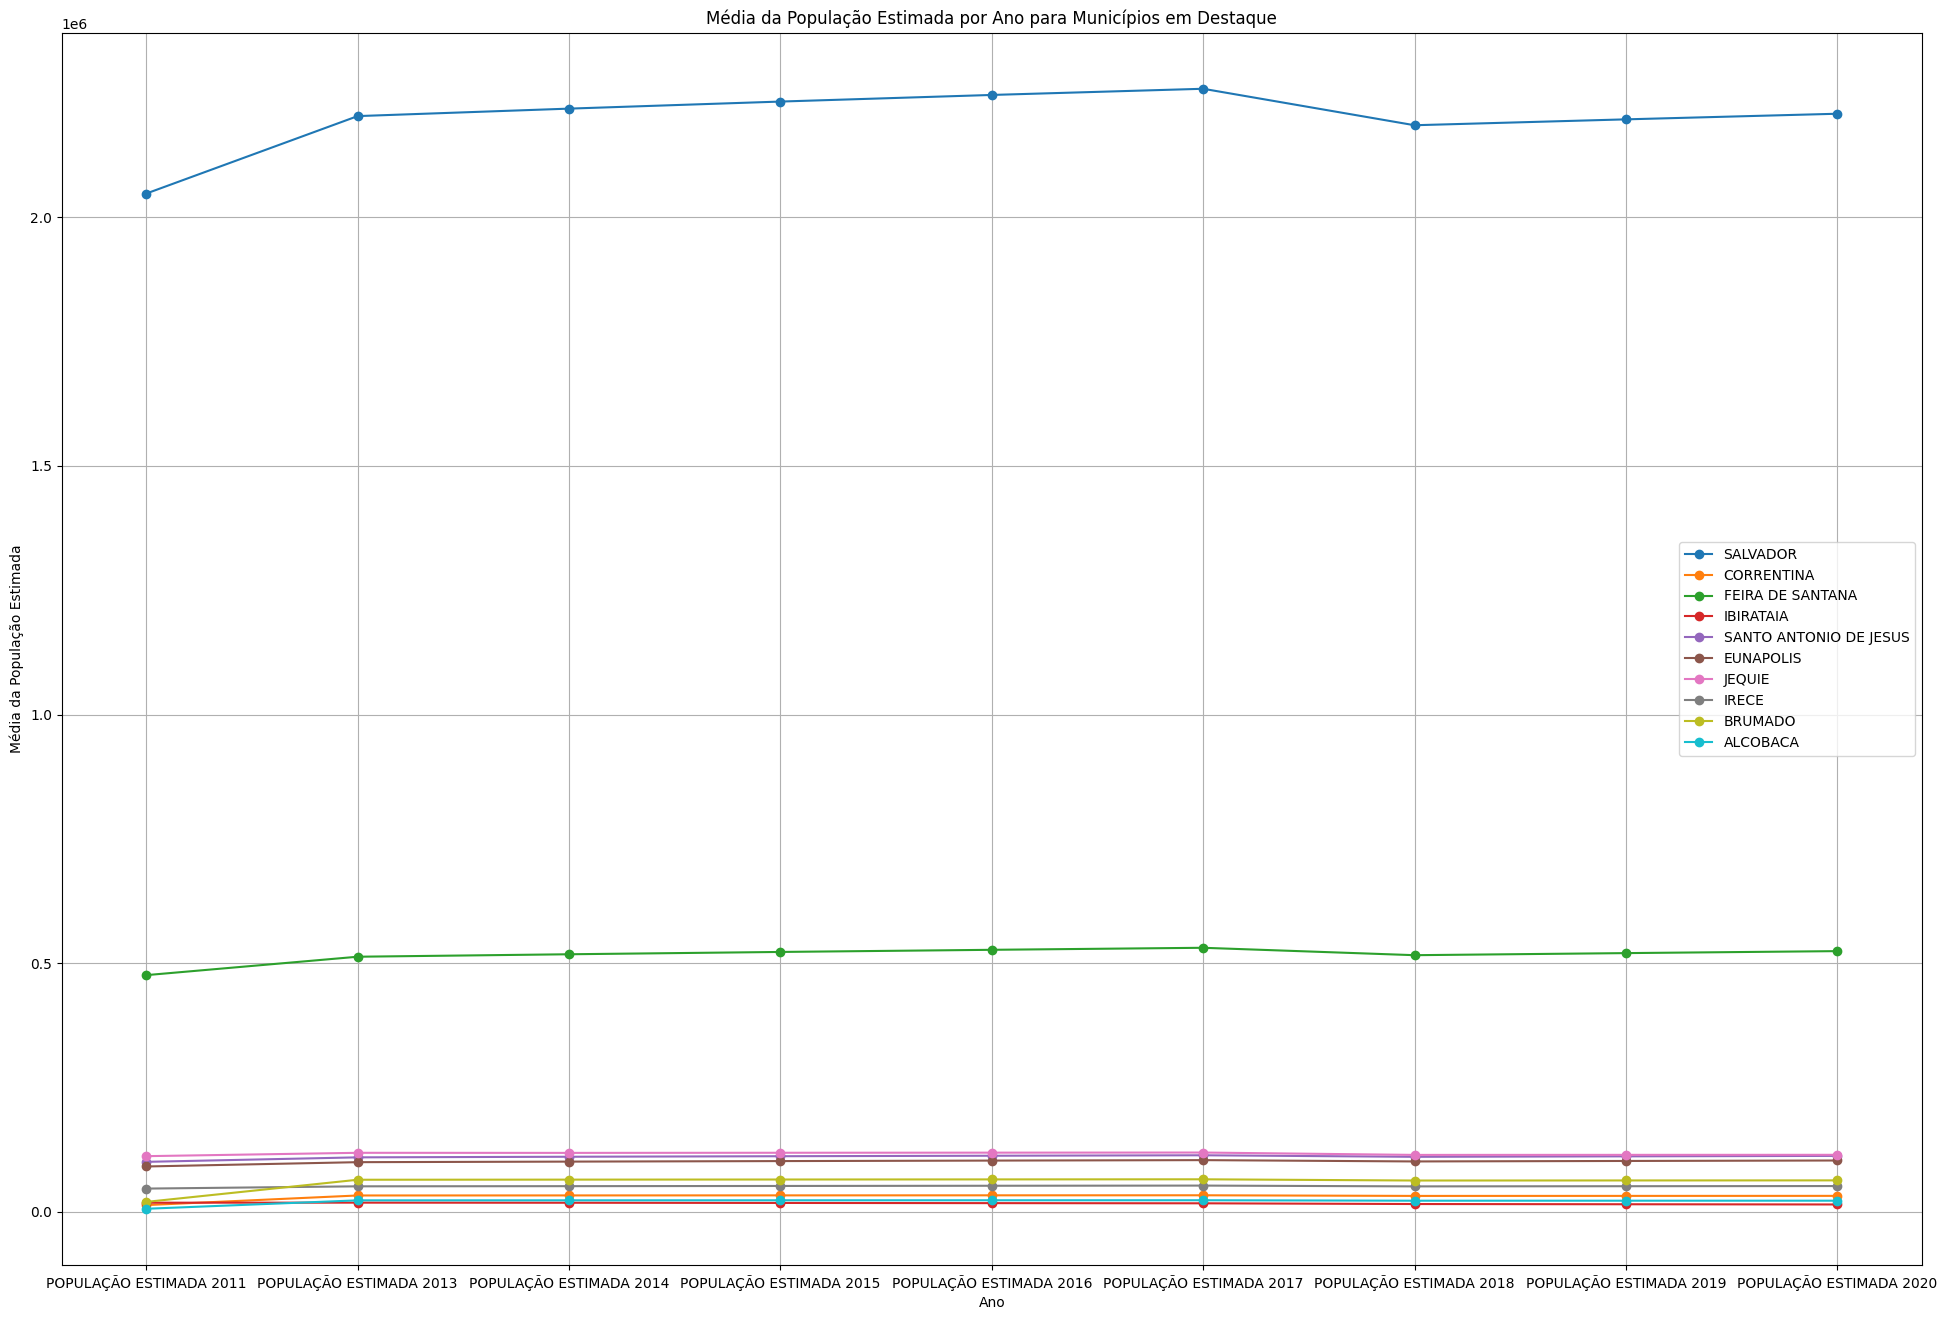

In [ ]:
import matplotlib.pyplot as plt

# Criar uma figura e eixos para o gráfico
fig, ax = plt.subplots(figsize=(24, 16))

# Iterar sobre os municípios em destaque
for municipio in municipios_destaque:
    # Filtrar os dados para o município atual
    dados_municipio = df_media_populacao_por_ano[df_media_populacao_por_ano['Município'] == municipio]

    # Plotar a linha para o município atual
    ax.plot(dados_municipio['Ano'], dados_municipio['Média da População Estimada'], marker='o', label=municipio)

# Adicionar rótulos aos eixos
ax.set_xlabel('Ano')
ax.set_ylabel('Média da População Estimada')
ax.set_title('Média da População Estimada por Ano para Municípios em Destaque')
ax.legend()

# Exibir o gráfico
plt.grid(True)
plt.show()



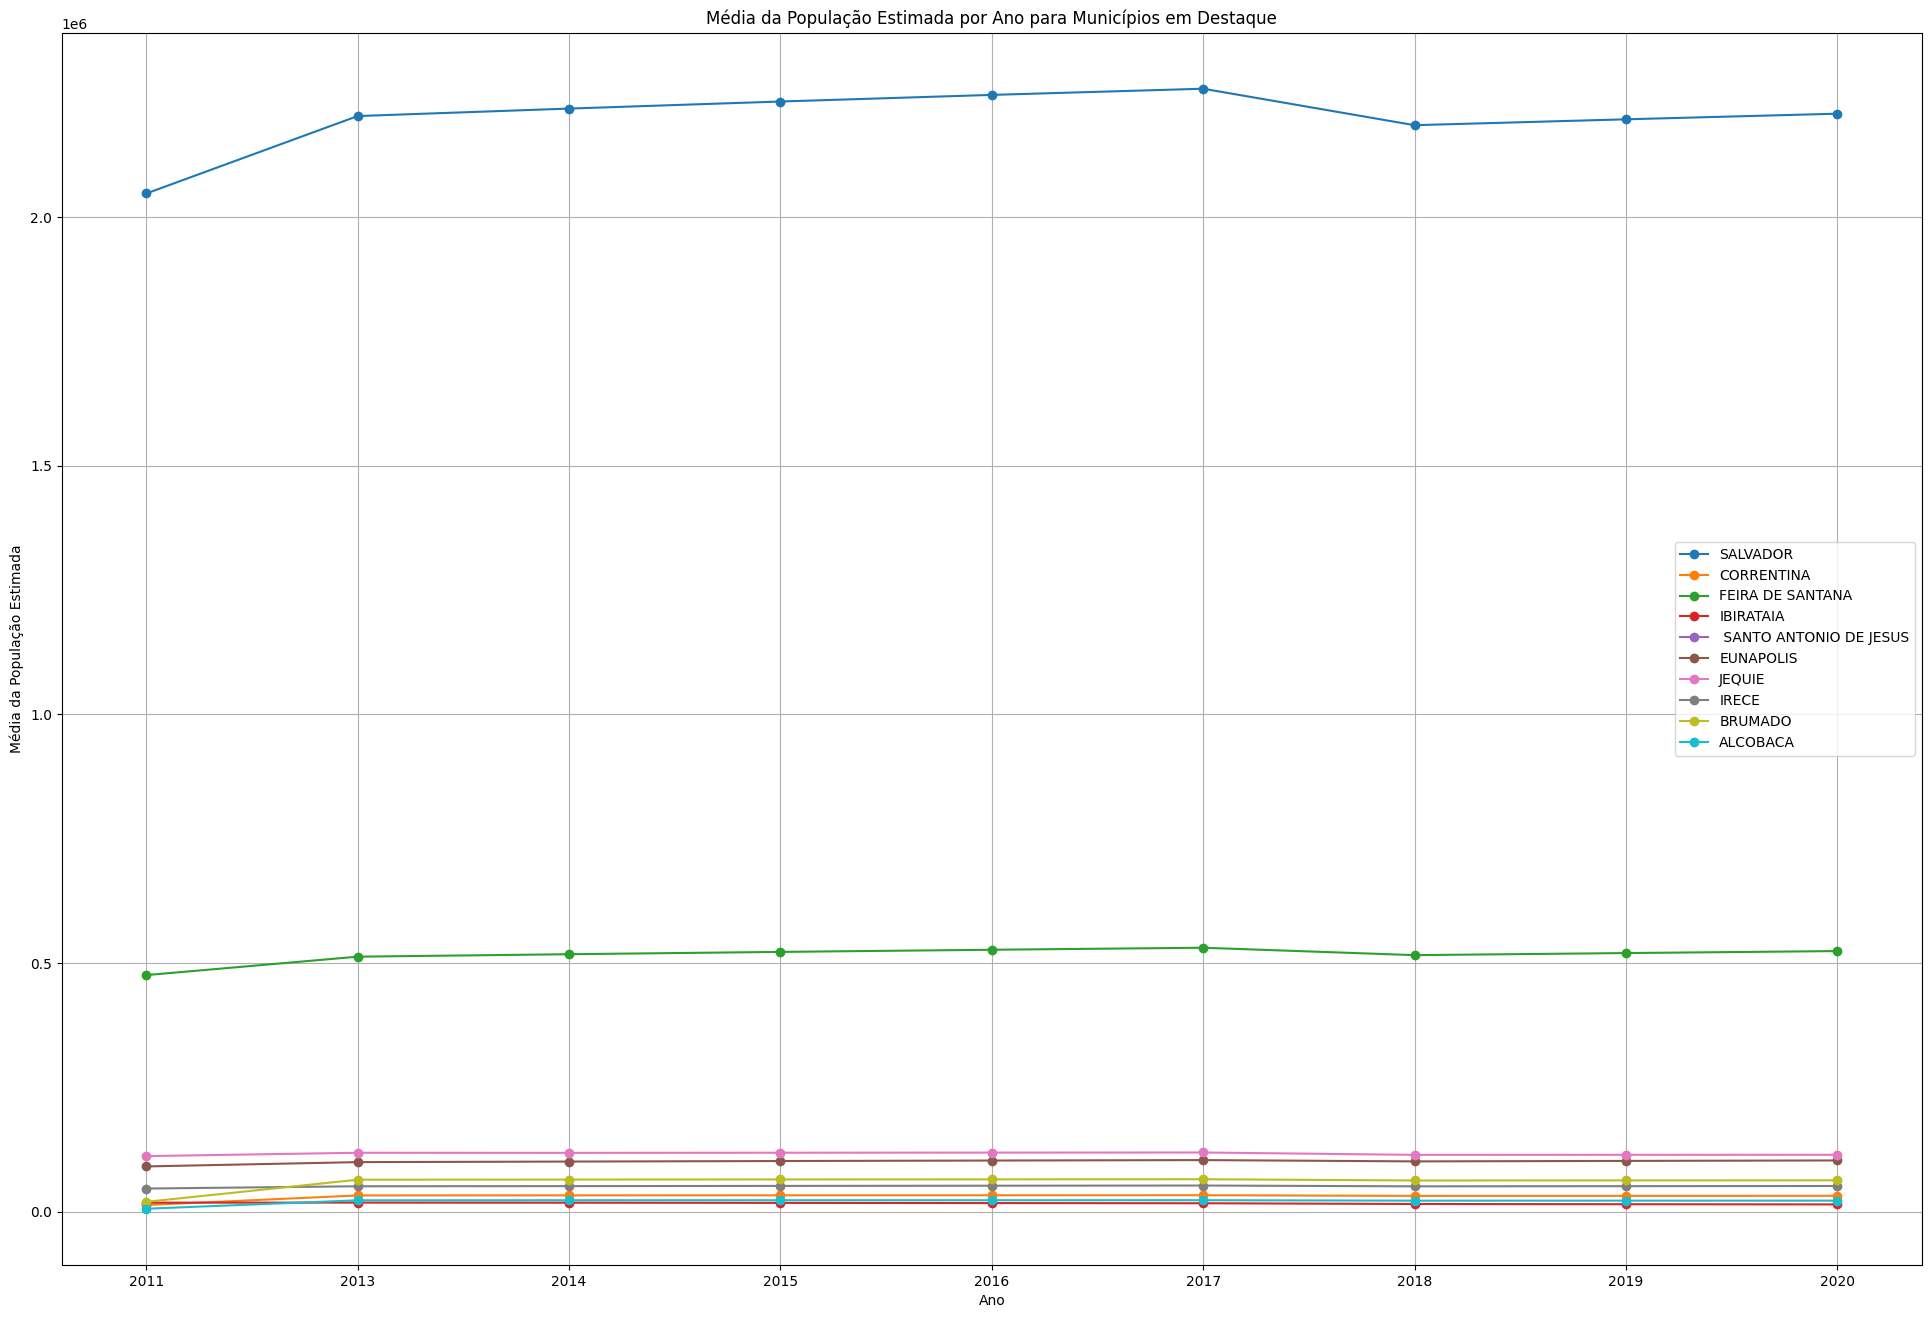

In [ ]:
import matplotlib.pyplot as plt

# Criar uma figura e eixos para o gráfico
fig, ax = plt.subplots(figsize=(24, 16))

# Iterar sobre os municípios em destaque
for municipio in municipios_destaque:
    # Filtrar os dados para o município atual
    dados_municipio = df_media_populacao_por_ano[df_media_populacao_por_ano['Município'] == municipio]

    # Plotar a linha para o município atual
    ax.plot(dados_municipio['Ano'].str.split().str[-1], dados_municipio['Média da População Estimada'], marker='o', label=municipio)

# Adicionar rótulos aos eixos
ax.set_xlabel('Ano')
ax.set_ylabel('Média da População Estimada')
ax.set_title('Média da População Estimada por Ano para Municípios em Destaque')
ax.legend()

# Exibir o gráfico
plt.grid(True)
plt.show()


In [ ]:
# Obtendo todas as UF presentes na coluna 'UF'
municipios = df['MUN_HOSP'].unique()

# Exibindo as UF
print("Municípios que houve hospitalização:")
print(municipios)


Municípios que houve hospitalização:
[nan 'VALENTE' 'BOTUPORA' 'GUANAMBI' 'MEDEIROS NETO' 'SERRA DOURADA'
 'BRUMADO' 'ALCOBACA' 'ITAMARAJU' 'JEQUIE' 'MUCURI' 'IBIRATAIA'
 'CICERO DANTAS' 'IUIU' 'UNA' 'EUNAPOLIS' 'PORTO SEGURO' 'UAUA' 'IBICUI'
 'TANQUE NOVO' 'SENTO SE' 'SENHOR DO BONFIM' 'SALVADOR' 'PARAMIRIM'
 'SEABRA' 'ITAGIBA' 'IBIPITANGA' 'SATIRO DIAS' 'LAJEDO DO TABOCAL'
 'BARREIRAS' 'WAGNER' 'RIACHAO DAS NEVES' 'ENCRUZILHADA' 'ESPLANADA'
 'CACULE' 'IRECE' 'CACHOEIRA' 'CAFARNAUM' 'IBITITA' 'CATURAMA' 'IPIAU'
 'BRASILIA' 'MORRO DO CHAPEU' 'FEIRA DE SANTANA' 'MARACAS' 'JUAZEIRO'
 'AMERICA DOURADA' 'POCOES' 'AIQUARA' 'IRAMAIA' 'ILHEUS' 'JAGUAQUARA'
 'VARZEA DO POCO' 'RIO DE CONTAS' 'ITABELA' 'PLANALTINO' 'CARAVELAS'
 'CASTRO ALVES' 'ITAJU DO COLONIA' 'CRAVOLANDIA' 'MACARANI' 'JACOBINA'
 'JUCURUCU' 'BAIXA GRANDE' 'SANTO ANTONIO DE JESUS' 'ITIRUCU' 'IPIRA'
 'CONDEUBA' 'CAEM' 'UIBAI' 'GANDU' 'ITACARE' 'CAATIBA' 'ITAPEBI'
 'ANDORINHA' 'ITABUNA' 'UBATA' 'SAPEACU' 'IBITIARA' 'CANDIDO SALES'

In [ ]:
# Selecionar as colunas para as quais você deseja encontrar os valores únicos
colunas_distinct = [
    'MANI_HEMOR', 'EPISTAXE', 'GENGIVO', 'METRO', 'PETEQUIAS',
    'HEMATURA', 'SANGRAM', 'LACO_N', 'PLASMATICO', 'EVIDENCIA',
    'PLAQ_MENOR', 'CON_FHD', 'COMPLICA', 'TP_SISTEMA',
    'NDUPLIC_N', 'CS_FLXRET', 'FLXRECEBI'
]

# Criar uma lista para armazenar os valores únicos de cada variável
valores_unicos = []

# Iterar sobre as colunas e encontrar os valores únicos
for coluna in colunas_distinct:
    valores_unicos_coluna = df[coluna].unique()
    valores_unicos.append({coluna: valores_unicos_coluna})

# Exibir os valores únicos encontrados para cada variável
for item in valores_unicos:
    print(item)


{'MANI_HEMOR': array([nan,  2.,  9.,  1.])}
{'EPISTAXE': array([nan,  1.,  2.])}
{'GENGIVO': array([nan,  2.,  1.])}
{'METRO': array([nan,  1.,  2.])}
{'PETEQUIAS': array([nan,  9.,  2.,  1.])}
{'HEMATURA': array([nan,  2.,  1.])}
{'SANGRAM': array([nan,  2.,  1.])}
{'LACO_N': array([nan,  2.,  1.,  9.])}
{'PLASMATICO': array([nan,  1.,  9.,  2.])}
{'EVIDENCIA': array([nan,  2.,  1.,  3.])}
{'PLAQ_MENOR': array([    nan,  30000.,  62000.,  12000., 183000.,  20100.,  47000.,
         4000.,  53000.,  86000.,  32000.,  15000.])}
{'CON_FHD': array([nan,  2.])}
{'COMPLICA': array([nan,  6.,  4.,  8.,  5.])}
{'TP_SISTEMA': array([ 2., nan])}
{'NDUPLIC_N': array([nan,  1.])}
{'CS_FLXRET': array([0., 2., 5., 1.])}
{'FLXRECEBI': array([nan,  2.])}


In [ ]:
# Carregue o arquivo CSV em um DataFrame, especificando o separador como ';'
df = pd.read_csv('/content/sample_data/dengue.csv', sep=';')

<ipython-input-272-921ac0f65d98>:2: DtypeWarning: Columns (27,49,51,88,104) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/sample_data/dengue.csv', sep=';')


In [ ]:
# Criar uma nova coluna "Desfecho"
df['Desfecho'] = df['DT_OBITO'].notnull().astype(int)

# Verificar a distribuição dos valores na coluna "Desfecho"
print(df['Desfecho'].value_counts())


0    38531
1       38
Name: Desfecho, dtype: int64


In [ ]:
# Criar uma nova coluna "Idoso"
df['Idoso'] = (df['IDADE'] > 65).astype(int)

# Verificar a distribuição dos valores na coluna "Idoso"
print(df['Idoso'].value_counts())


0    36478
1     2091
Name: Idoso, dtype: int64


In [ ]:
df

,NU_NOTIFIC,ID_PESSOA,NOME,COMUNINF,ID_MN_RESI,ID_MUNICIP,MUNICIPIO,TP_NOT,ID_AGRAVO,DT_NOTIFIC,...,MUN_SAUDENOT,UF_SAUDENOT,MUNI_RESI,UF_RESI,MUN_INFEC,UF_INFEC,IDADE,SEM_PRI_V,Desfecho,Idoso
0,10110,291800-291800-1982-06-23-M-4.0,ALBERTO GARCIA MACIEL FILHO AGUIAR,290060.0,291800,291800,NaN,2,A90,2012-12-31,...,JEQUIE,29,JEQUIE,29,AIQUARA,29.0,30.0,1.0,0,0
1,1994,291800-291800-1984-07-26-M-4.0,MARCIO RIBEIRO FONSECA,NaN,291800,291800,NaN,2,A90,2013-01-01,...,JEQUIE,29,JEQUIE,29,NaN,NaN,28.0,1.0,0,0
2,5321,291890-291890-1988-06-22-F-2.0,SOLANGE MOREIRA SANTOS CARDOSO ASSIS,291890.0,291890,291890,NaN,2,A90,2013-01-01,...,LAJEDAO,29,LAJEDAO,29,LAJEDAO,29.0,24.0,1.0,0,0
3,15811,293105-293105-2004-12-29-F-2.0,PATRICIA BORGES ROCHA,293105.0,293105,293105,NaN,2,A90,2013-01-01,...,TANQUE NOVO,29,TANQUE NOVO,29,TANQUE NOVO,29.0,8.0,1.0,0,0
4,23461,293105-293105-1961-01-25-M-2.0,WALTER AMARAL RIBEIRO RODRIGUES PINHEIRO,293105.0,293105,293105,NaN,2,A90,2013-01-01,...,TANQUE NOVO,29,TANQUE NOVO,29,TANQUE NOVO,29.0,51.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38564,19618,291080-291080-1985-10-04-F-9.0,NEUZA SOUSA FERNANDES AGUIAR,NaN,291080,291080,NaN,2,A90,2019-12-28,...,FEIRA DE SANTANA,29,FEIRA DE SANTANA,29,NaN,NaN,34.0,52.0,0,0
38565,6805,292740-292740-1981-05-01-M-4.0,MARCELO MORAES MIRANDA NUNES COELHO,NaN,292740,292740,NaN,2,A90,2019-12-28,...,SALVADOR,29,SALVADOR,29,NaN,NaN,38.0,52.0,0,0
38566,16531,292740-292740-1996-10-04-M-9.0,JOAQUIM MACEDO CORREIA MELO,NaN,292740,292740,NaN,2,A90,2019-12-28,...,SALVADOR,29,SALVADOR,29,NaN,NaN,23.0,52.0,0,0
38567,31594,292740-292740-1991-07-05-F-9.0,LIDIA TAVARES CORREIA,NaN,292740,292740,NaN,2,A90,2019-12-28,...,SALVADOR,29,SALVADOR,29,NaN,NaN,28.0,52.0,0,0


In [ ]:
df

,NU_NOTIFIC,ID_PESSOA,NOME,COMUNINF,ID_MN_RESI,ID_MUNICIP,MUNICIPIO,TP_NOT,ID_AGRAVO,DT_NOTIFIC,...,MUNI_RESI,UF_RESI,MUN_INFEC,UF_INFEC,IDADE,SEM_PRI_V,Desfecho,Idoso,Score de Gravidade,Score de Sinais e Sintomas
0,10110,291800-291800-1982-06-23-M-4.0,ALBERTO GARCIA MACIEL FILHO AGUIAR,290060.0,291800,291800,NaN,2,A90,2012-12-31,...,JEQUIE,29,AIQUARA,29.0,30.0,1.0,0,0,0,0
1,1994,291800-291800-1984-07-26-M-4.0,MARCIO RIBEIRO FONSECA,NaN,291800,291800,NaN,2,A90,2013-01-01,...,JEQUIE,29,NaN,NaN,28.0,1.0,0,0,0,0
2,5321,291890-291890-1988-06-22-F-2.0,SOLANGE MOREIRA SANTOS CARDOSO ASSIS,291890.0,291890,291890,NaN,2,A90,2013-01-01,...,LAJEDAO,29,LAJEDAO,29.0,24.0,1.0,0,0,0,0
3,15811,293105-293105-2004-12-29-F-2.0,PATRICIA BORGES ROCHA,293105.0,293105,293105,NaN,2,A90,2013-01-01,...,TANQUE NOVO,29,TANQUE NOVO,29.0,8.0,1.0,0,0,0,0
4,23461,293105-293105-1961-01-25-M-2.0,WALTER AMARAL RIBEIRO RODRIGUES PINHEIRO,293105.0,293105,293105,NaN,2,A90,2013-01-01,...,TANQUE NOVO,29,TANQUE NOVO,29.0,51.0,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38564,19618,291080-291080-1985-10-04-F-9.0,NEUZA SOUSA FERNANDES AGUIAR,NaN,291080,291080,NaN,2,A90,2019-12-28,...,FEIRA DE SANTANA,29,NaN,NaN,34.0,52.0,0,0,0,0
38565,6805,292740-292740-1981-05-01-M-4.0,MARCELO MORAES MIRANDA NUNES COELHO,NaN,292740,292740,NaN,2,A90,2019-12-28,...,SALVADOR,29,NaN,NaN,38.0,52.0,0,0,0,0
38566,16531,292740-292740-1996-10-04-M-9.0,JOAQUIM MACEDO CORREIA MELO,NaN,292740,292740,NaN,2,A90,2019-12-28,...,SALVADOR,29,NaN,NaN,23.0,52.0,0,0,0,0
38567,31594,292740-292740-1991-07-05-F-9.0,LIDIA TAVARES CORREIA,NaN,292740,292740,NaN,2,A90,2019-12-28,...,SALVADOR,29,NaN,NaN,28.0,52.0,0,0,0,0


In [ ]:
# Lista das colunas para encontrar os valores únicos
colunas_sinais_sintomas = [
    'FEBRE',
    'MIALGIA',
    'CEFALEIA',
    'EXANTEMA',
    'VOMITO',
    'NAUSEA',
    'DOR_COSTAS',
    'CONJUNTVIT',
    'ARTRITE',
    'ARTRALGIA',
    'PETEQUIA_N',
    'LEUCOPENIA',
    'LACO',
    'DOR_RETRO',
    'DIABETES',
    'HEMATOLOG',
    'HEPATOPAT',
    'RENAL',
    'HIPERTENSA',
    'ACIDO_PEPT',
    'AUTO_IMUNE'
]

# Lista para armazenar os valores únicos de cada variável
valores_unicos_sinais_sintomas = []

# Iterar sobre as colunas e encontrar os valores únicos
for coluna in colunas_sinais_sintomas:
    valores_unicos_coluna = df[coluna].unique()
    valores_unicos_sinais_sintomas.append({coluna: valores_unicos_coluna})

# Exibir os valores únicos encontrados para cada variável
for item in valores_unicos_sinais_sintomas:
    print(item)





{'FEBRE': array([nan,  1.,  2.])}
{'MIALGIA': array([nan,  1.,  2.])}
{'CEFALEIA': array([nan,  1.,  2.])}
{'EXANTEMA': array([nan,  1.,  2.])}
{'VOMITO': array([nan,  2.,  1.])}
{'NAUSEA': array([nan,  2.,  1.])}
{'DOR_COSTAS': array([nan,  2.,  1.])}
{'CONJUNTVIT': array([nan,  2.,  1.])}
{'ARTRITE': array([nan,  2.,  1.])}
{'ARTRALGIA': array([nan,  2.,  1.])}
{'PETEQUIA_N': array([nan,  2.,  1.])}
{'LEUCOPENIA': array([nan,  2.,  1.])}
{'LACO': array([nan,  1.,  2.])}
{'DOR_RETRO': array([nan,  1.,  2.])}
{'DIABETES': array([nan,  2.,  1.])}
{'HEMATOLOG': array([nan,  2.,  1.])}
{'HEPATOPAT': array([nan,  2.,  1.])}
{'RENAL': array([nan,  2.,  1.])}
{'HIPERTENSA': array([nan,  2.,  1.])}
{'ACIDO_PEPT': array([nan,  2.,  1.])}
{'AUTO_IMUNE': array([nan,  2.,  1.])}


In [ ]:
# Lista das colunas a serem consideradas
colunas_gravidade = ['GRAV_PULSO', 'GRAV_CONV', 'GRAV_ENCH', 'GRAV_INSUF', 'GRAV_TAQUI', 'GRAV_EXTRE',
                     'GRAV_HIPOT', 'GRAV_HEMAT', 'GRAV_MELEN', 'GRAV_METRO', 'GRAV_SANG', 'GRAV_AST',
                     'GRAV_MIOC', 'GRAV_CONSC', 'GRAV_ORGAO']

# Contagem de ocorrências do número 1 em cada coluna
ocorrencias_1 = df[colunas_gravidade].eq(1).sum(axis=1)

# Criar a coluna "Score de Gravidade"
df['Score de Gravidade'] = ocorrencias_1.apply(lambda x: 1 if x >= 3 else 0)


In [ ]:
# Lista das colunas a serem consideradas
colunas_sinais_sintomas = ['GRAV_PULSO', 'GRAV_CONV', 'GRAV_ENCH', 'GRAV_INSUF', 'GRAV_TAQUI', 'GRAV_EXTRE',
                     'GRAV_HIPOT', 'GRAV_HEMAT', 'GRAV_MELEN', 'GRAV_METRO', 'GRAV_SANG', 'GRAV_AST',
                     'GRAV_MIOC', 'GRAV_CONSC', 'GRAV_ORGAO']

# Contagem de ocorrências do número 1 em cada coluna
ocorrencias_2 = df[colunas_sinais_sintomas].eq(1).sum(axis=1)

# Criar a coluna "Score de Gravidade"
df['Score de Sinais e Sintomas'] = ocorrencias_1.apply(lambda x: 1 if x >= 3 else 0)


In [ ]:
# Filtrar os valores distintos na coluna 'Score de Gravidade' e contar a ocorrência de cada valor
contagem_distinta = df['Score de Gravidade'].dropna().value_counts()

# Contar o número total de valores distintos na coluna 'Score de Gravidade'
total_distintos = len(contagem_distinta)

print("Valores distintos na coluna 'Score de Gravidade':", total_distintos)
print("\nContagem de ocorrências de cada valor:")
print(contagem_distinta)


Valores distintos na coluna 'Score de Gravidade': 2

Contagem de ocorrências de cada valor:
0    38566
1        3
Name: Score de Gravidade, dtype: int64


In [ ]:
# Filtrar os valores distintos na coluna 'Score de Gravidade' e contar a ocorrência de cada valor
contagem_distinta1 = df['Score de Sinais e Sintomas'].dropna().value_counts()

# Contar o número total de valores distintos na coluna 'Score de Gravidade'
total_distintos1 = len(contagem_distinta1)

print("Valores distintos na coluna 'Score de Sinais e Sintomas':", total_distintos)
print("\nContagem de ocorrências de cada valor:")
print(contagem_distinta1)

Valores distintos na coluna 'Score de Sinais e Sintomas': 2

Contagem de ocorrências de cada valor:
0    38566
1        3
Name: Score de Sinais e Sintomas, dtype: int64


In [ ]:
# Selecionar as últimas quatro colunas
df_ultimas_quatro = df.iloc[:, -4:]

# Exibir o DataFrame resultante
print(df_ultimas_quatro)


       Desfecho  Idoso  Score de Gravidade  Score de Sinais e Sintomas
0             0      0                   0                           0
1             0      0                   0                           0
2             0      0                   0                           0
3             0      0                   0                           0
4             0      0                   0                           0
...         ...    ...                 ...                         ...
38564         0      0                   0                           0
38565         0      0                   0                           0
38566         0      0                   0                           0
38567         0      0                   0                           0
38568         0      0                   0                           0

[38569 rows x 4 columns]


In [ ]:
import pandas as pd

# Mapear os valores 0 e 1 para 'Não' e 'Sim'
mapeamento = {0: 'Não', 1: 'Sim'}

# Criar um dicionário para armazenar os valores mapeados e suas contagens
valores_mapeados = {}

# Iterar sobre as colunas do DataFrame
for coluna in df_ultimas_quatro.columns:
    # Obter os valores únicos e suas contagens para cada coluna
    valores_unicos = df_ultimas_quatro[coluna].map(mapeamento).value_counts()
    # Adicionar os valores mapeados ao dicionário
    valores_mapeados[coluna] = valores_unicos

# Converter o dicionário em um DataFrame
tabela_valores_mapeados = pd.DataFrame(valores_mapeados)

# Exibir a tabela com o título "Engenharia de Variáveis"
print("Engenharia de Variáveis")
print(tabela_valores_mapeados)


Engenharia de Variáveis
     Desfecho  Idoso  Score de Gravidade  Score de Sinais e Sintomas
Não     38531  36478               38566                       38566
Sim        38   2091                   3                           3


In [ ]:
# Dividir o DataFrame em duas partes: uma com Score de Gravidade igual a 0 e outra com Score de Gravidade igual a 1
df_score_0 = df[df['Desfecho'] == 0]
df_score_1 = df[df['Desfecho'] == 1]

# Subamostrar a classe majoritária (Score de Gravidade igual a 0) para que tenha o mesmo número de amostras da classe minoritária (Score de Gravidade igual a 1)
df_score_0_sampled = df_score_0.sample(len(df_score_1), replace=False)

# Combinar as duas partes subamostradas em um único DataFrame balanceado
df_balanced = pd.concat([df_score_0_sampled, df_score_1])

# Embaralhar as linhas do DataFrame balanceado
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

#Balanceando Classes#

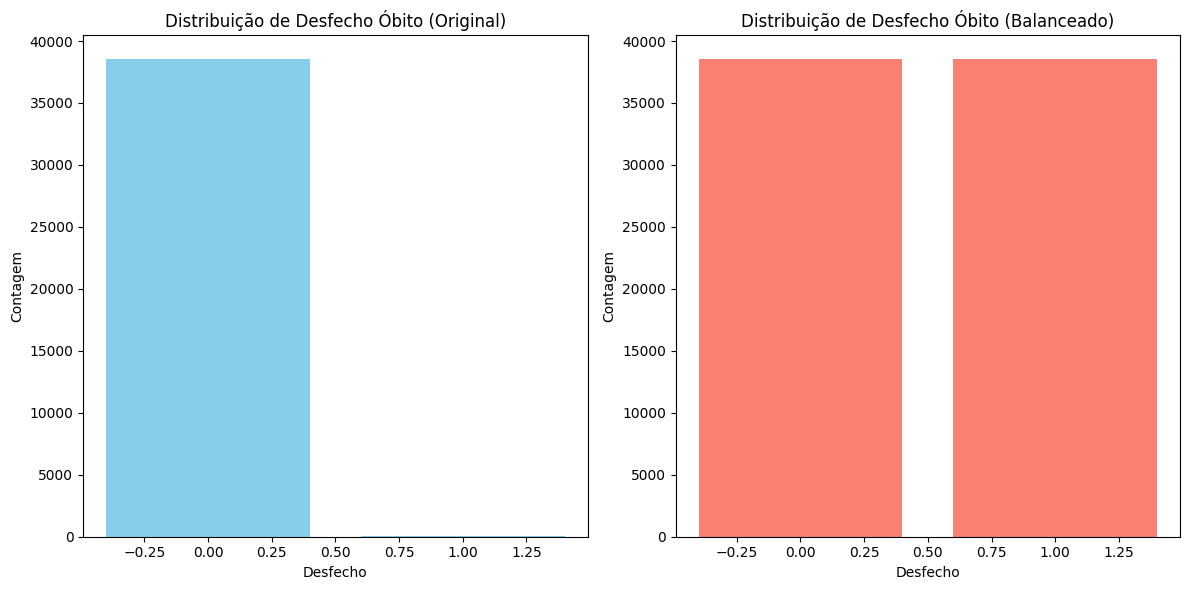

In [ ]:
from sklearn.utils import resample

# Separar as classes de acordo com os valores de Desfecho
df_obito = df_ultimas_quatro[df_ultimas_quatro['Desfecho'] == 1]
df_nao_obito = df_ultimas_quatro[df_ultimas_quatro['Desfecho'] == 0]

# Realizar o balanceamento (oversampling) da classe minoritária (Desfecho = 1)
df_obito_balanced = resample(df_obito, replace=True, n_samples=len(df_nao_obito), random_state=42)

# Combinar os DataFrames balanceados
df_balanced = pd.concat([df_nao_obito, df_obito_balanced])

# Contagem das classes de Desfecho no DataFrame original (df_ultimas_quatro)
contagem_score_original = df_ultimas_quatro['Desfecho'].value_counts()

# Contagem das classes de Desfecho no DataFrame balanceado (df_balanced)
contagem_score_balanceado = df_balanced['Desfecho'].value_counts()

# Criar subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras para o DataFrame original (df_ultimas_quatro)
axs[0].bar(contagem_score_original.index, contagem_score_original.values, color='skyblue')
axs[0].set_title('Distribuição de Desfecho Óbito (Original)')
axs[0].set_xlabel('Desfecho')
axs[0].set_ylabel('Contagem')

# Gráfico de barras para o DataFrame balanceado (df_balanced)
axs[1].bar(contagem_score_balanceado.index, contagem_score_balanceado.values, color='salmon')
axs[1].set_title('Distribuição de Desfecho Óbito (Balanceado)')
axs[1].set_xlabel('Desfecho')
axs[1].set_ylabel('Contagem')

# Exibir os gráficos
plt.tight_layout()
plt.show()


In [ ]:
df_balanced = df_ultimas_quatro.copy()
df_balanced

,Desfecho,Idoso,Score de Gravidade,Score de Sinais e Sintomas
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
38564,0,0,0,0
38565,0,0,0,0
38566,0,0,0,0
38567,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separando as variáveis independentes (X) e a variável dependente (y)
X = df_balanced.drop('Desfecho', axis=1)  # Variáveis independentes
y = df_balanced['Desfecho']  # Variável dependente

# Dividindo os dados em conjunto de treinamento e teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializando o modelo de regressão logística
model = LogisticRegression()

# Treinando o modelo nos dados de treinamento
model.fit(X_train, y_train)

# Fazendo previsões nos dados de teste
y_pred = model.predict(X_test)

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# Calculando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

# Imprimindo o relatório de classificação
class_report = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(class_report)



Acurácia: 0.9990925589836661
Matriz de Confusão:
[[7707    0]
 [   7    0]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7707
           1       0.00      0.00      0.00         7

    accuracy                           1.00      7714
   macro avg       0.50      0.50      0.50      7714
weighted avg       1.00      1.00      1.00      7714



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acurácia: A acurácia do modelo foi de 99,91%, o que indica que a maioria das previsões feitas pelo modelo está correta.

Matriz de Confusão: A matriz de confusão mostra que o modelo fez previsões corretas para todas as instâncias da classe 0 (não Desfecho), mas não fez previsões corretas para nenhuma instância da classe 1 (Desfecho). Isso pode indicar um desequilíbrio nos dados ou problemas de sobreajuste.

Relatório de Classificação: O relatório de classificação mostra que o modelo teve uma precisão de 100% para a classe 0, mas uma precisão de 0% para a classe 1. Isso indica que o modelo está previsando consistentemente a classe dominante (classe 0), mas está falhando em prever a classe minoritária (classe 1). O recall e a F1-score também são 0% para a classe 1.

Conclusões: Este modelo parece ter um bom desempenho na previsão da classe dominante, mas falha na previsão da classe minoritária. Isso pode ser devido a um desequilíbrio nos dados ou ao modelo não ser suficientemente sensível para detectar a classe minoritária. É importante considerar estratégias de balanceamento de dados ou experimentar com outros algoritmos de classificação para melhorar o desempenho do modelo na previsão de ambas as classes.






LR: 0.999015 (0.000302)
LDA: 0.999041 (0.000308)
NB: 0.999041 (0.000308)
KNN: 0.999015 (0.000302)
CART: 0.998989 (0.000295)
SVM: 0.998989 (0.000295)
RNN: 0.999015 (0.000302)


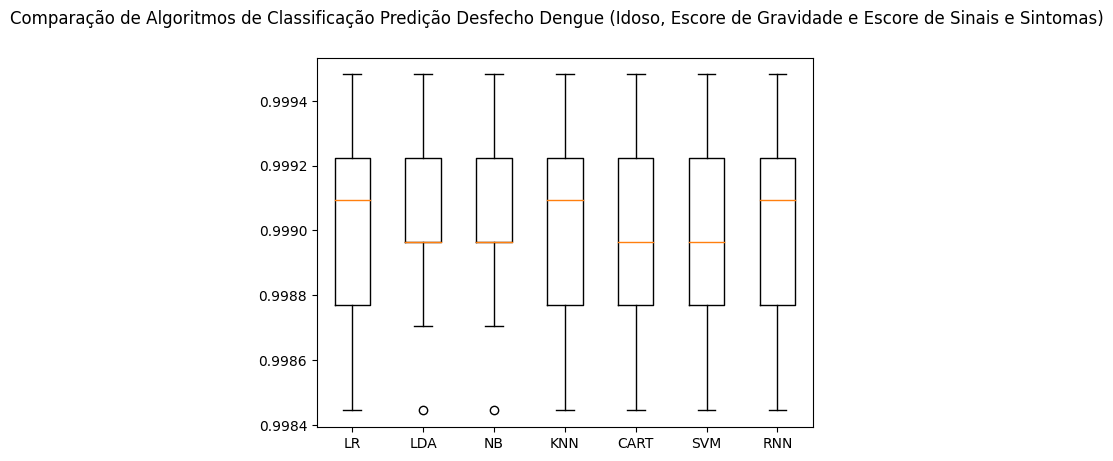

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Definindo o número de folds
num_folds = 10

# Definindo os resultados, nomes e modelos
resultados = []
nomes = []
modelos = []

# Adicionando os modelos
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))
modelos.append(('RNN', MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)))

# Iterando sobre os modelos
for nome, modelo in modelos:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=1)
    cv_results = cross_val_score(modelo, df_balanced.drop('Desfecho', axis=1), df_balanced['Desfecho'], cv=kfold, scoring='accuracy')
    cm_results = cross_val_predict(modelo, df_balanced.drop('Desfecho', axis=1), df_balanced['Desfecho'], cv=kfold)
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Plotando os resultados
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação Predição Desfecho Dengue (Idoso, Escore de Gravidade e Escore de Sinais e Sintomas)')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()



Com base nas acurácias médias dos modelos apresentadas, em ordem de melhor para pior, temos:

LDA (Linear Discriminant Analysis) - 0.999041 NB (Naive Bayes) - 0.999041 LR (Logistic Regression) - 0.999015 KNN (K-Nearest Neighbors) - 0.999015 RNN (Multilayer Perceptron Classifier) - 0.999015 SVM (Support Vector Machine) - 0.998989 CART (Decision Tree Classifier) - 0.998989 Portanto, o LDA e o NB apresentaram as melhores performances, seguidos por LR, KNN e RNN, enquanto SVM e CART apresentaram as performances um pouco mais baixas em comparação com os outros modelos.

In [ ]:
'''
Instalação das bibliotecas importantes
'''
#Análise descritiva através do relatório automatizado
!pip install pandas -q
!pip install numpy -q
!pip uninstall pandas-profiling -y -q
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q
import pandas as pd
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title = "Relatório", html = {"style":{"full_width": True}})
profile.to_file(output_file = "/content/Relatório Base de Dados HTML")

  Preparing metadata (setup.py) ... done


<ipython-input-312-2def9ab04cf2>:9: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:375: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
!pip install pdfkit -q
!apt-get install -y wkhtmltopdf
import pdfkit

# Converter HTML para PDF
pdfkit.from_file('/content/Relatório Base de Dados HTML.html', '/content/Relatório Base de Dados PDF.pdf')


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  avahi-daemon bind9-host bind9-libs geoclue-2.0 glib-networking glib-networking-common
  glib-networking-services gsettings-desktop-schemas iio-sensor-proxy libavahi-core7 libavahi-glib1
  libdaemon0 libevdev2 libfontenc1 libgudev-1.0-0 libhyphen0 libinput-bin libinput10
  libjson-glib-1.0-0 libjson-glib-1.0-common liblmdb0 libmaxminddb0 libmbim-glib4 libmbim-proxy
  libmd4c0 libmm-glib0 libmtdev1 libnl-genl-3-200 libnotify4 libnss-mdns libproxy1v5 libqmi-glib5
  libqmi-proxy libqt5core5a libqt5dbus5 libqt5gui5 libqt5network5 libqt5positioning5
  libqt5printsupport5 libqt5qml5 libqt5qmlmodels5 libqt5quick5 libqt5sensors5 libqt5svg5
  libqt5webchannel5 libqt5webkit5 libqt5widgets5 libsoup2.4-1 libsoup2.4-common libudev1
  libwacom-bin libwacom-common libwacom9 libwoff1 libxcb-icccm4 libxcb-image0 libxcb-keysyms1
  libxcb-render-util0 libx